In [1]:
#.libPaths(c("/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1","/home/data/refdir/Rlib"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(Matrix)
library(cowplot)
library(ggplot2)
library(harmony)
setwd('/home/data/t060324/jobs/aimin/')

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians

## 1. LM22  CIBERSORT

In [2]:
library(GSVA)
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')
modules_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]

In [3]:
TCGA_OV_TPM_log <- readRDS(file = './data/bulk/TCGA_OV_TPM_log2.RDS')

In [38]:
modules_score <- gsva(expr = TCGA_OV_TPM_log,gset.idx.list = modules_list,method='gsva',kcdf="Gaussian")

Warning message in .filterFeatures(expr, method):
“556 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”
Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
“Some gene sets have size one. Consider setting 'min.sz > 1'.”


Estimating GSVA scores for 27 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



In [7]:
rownames(modules_score) <-  sub(pattern = 'c1_',replacement = 'M',rownames(modules_score))

In [8]:
OV_TCGA_cibersortResult <- read.csv('/home/data/t060324/jobs/aimin/data/bulk/CIBERSORTx_OV_LM22.csv',header = T,sep = ',')

In [9]:
tmp_data <- OV_TCGA_cibersortResult[,c(2:23)]

In [18]:
myBreaks <- c(seq(min(tmp_data), 0, length.out=ceiling(50/2) + 1), 
              seq(0.5/50, 0.5, length.out=floor(50/2)))
myBreaks

[1] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [7] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
[13] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
[19] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
[25] 0.00000000 0.00000000 0.01000000 0.03041667 0.05083333 0.07125000
[31] 0.09166667 0.11208333 0.13250000 0.15291667 0.17333333 0.19375000
[37] 0.21416667 0.23458333 0.25500000 0.27541667 0.29583333 0.31625000
[43] 0.33666667 0.35708333 0.37750000 0.39791667 0.41833333 0.43875000
[49] 0.45916667 0.47958333 0.50000000

In [20]:
head(tmp_data)

Naive B cell Memory B cell Plasma cell CD8+ T cell Naive T cell
1 0.005799362  0.025353589   0.02255307  0.09168425  0           
2 0.011185668  0.009855082   0.01154366  0.04192526  0           
3 0.042523638  0.000000000   0.01168012  0.07771634  0           
4 0.024309442  0.028617228   0.10612287  0.08263018  0           
5 0.004273258  0.043732998   0.00000000  0.02223793  0           
6 0.034572423  0.049849486   0.03853267  0.04239041  0           
  Resting memory CD4+ T cell Activated memory CD4+ T cell Tfh       
1 0.1967998                  0.02559313                   0.03165946
2 0.1773264                  0.00000000                   0.00000000
3 0.2194158                  0.00000000                   0.00000000
4 0.1372219                  0.00000000                   0.04713265
5 0.1742126                  0.00000000                   0.02316115
6 0.1713421                  0.00000000                   0.01832066
  Treg        γδ T cell   ⋯ Monocytes  Macrophages-M0 Macrophages-M1
1 0.035653325 0.000000000 ⋯ 0.03256407 0.1780989      0.12934653    
2 0.022758046 0.010215808 ⋯ 0.00000000 0.4073994      0.07220625    
3 0.008133813 0.000000000 ⋯ 0.05852991 0.2497034      0.06292065    
4 0.066492940 0.001519524 ⋯ 0.02261525 0.1102965      0.06865096    
5 0.014139876 0.000000000 ⋯ 0.01943710 0.3862729      0.07157361    
6 0.055134968 0.016296244 ⋯ 0.00000000 0.2427856      0.06987504    
  Macrophages-M2 Resting DC   Activated DC Resting mast cell
1 0.1382442      0.0006336813 0.000000000  0.02113723       
2 0.1601396      0.0000000000 0.000000000  0.00000000       
3 0.1563652      0.0667547213 0.000000000  0.01723346       
4 0.1893627      0.0134781459 0.006223509  0.02927667       
5 0.1634740      0.0017268490 0.002194608  0.00000000       
6 0.2160437      0.0000000000 0.000000000  0.01859786       
  Activated mast cell Eosinophils Neutrophils
1 0.000000000         0.000000000 0.003036120
2 0.040333856         0.000000000 0.003029567
3 0.000000000         0.000000000 0.000000000
4 0.000000000         0.001449564 0.004817282
5 0.042857730         0.003370263 0.002659765
6 0.004168403         0.000000000 0.000000000

Warning message in cor(OV_TCGA_cibersortResult[, c(2:23)]):
“the standard deviation is zero”


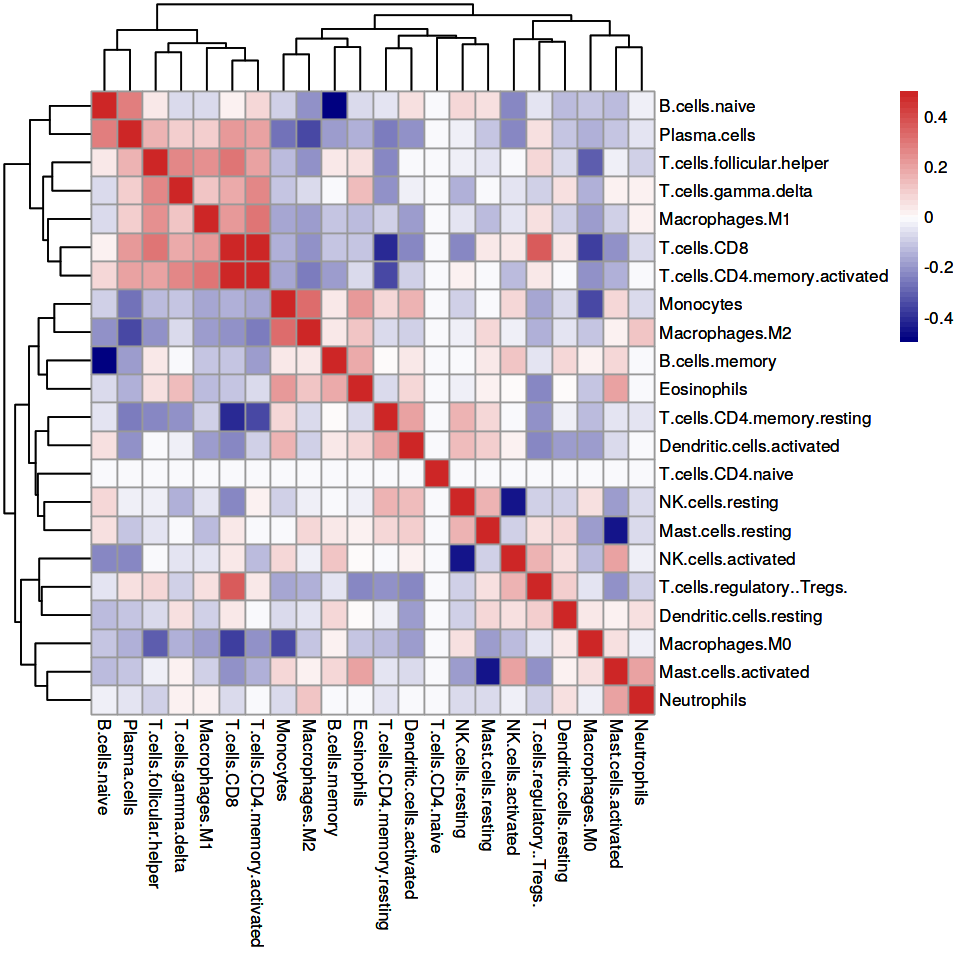

In [22]:
library(pheatmap)
tmp <- cor(OV_TCGA_cibersortResult[,c(2:23)])
tmp[which(is.na(tmp))] <- 0
#tmp[which(tmp>0.5)] <- 0.5
myBreaks <- c(seq(min(tmp), 0, length.out=ceiling(50/2) + 1), 
              seq(0.5/50, 0.5, length.out=floor(50/2)))
options(repr.plot.height = 8, repr.plot.width = 8)
p1 <- pheatmap(tmp,color = colorRampPalette(c("navy", "white", "firebrick3"))(50),breaks = myBreaks)
p1


In [23]:
colnames(tmp_data) <- c('Naive B cell','Memory B cell','Plasma cell','CD8+ T cell',
                        'Naive T cell','Resting memory CD4+ T cell','Activated memory CD4+ T cell',
                       'Tfh','Treg','γδ T cell','Resting NK','Activated NK',
                        'Monocytes','Macrophages-M0','Macrophages-M1','Macrophages-M2','Resting DC','Activated DC',
                        'Resting mast cell','Activated mast cell','Eosinophils','Neutrophils')

In [24]:
cor2M22<- list()
for(moduleName in rownames(modules_score)){
    
    cor2M22[[moduleName]] <- do.call(rbind,lapply(colnames(tmp_data),function(HM){
        cor.res <- cor.test(tmp_data[,HM],modules_score[moduleName,])
        return(data.frame(module=moduleName,celltype=HM,cor=cor.res$estimate,p=cor.res$p.value))
    }))
}

Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation i

In [25]:
cor2M22_sub <- cor2M22[c('M8','M3')]
cor2M22_sub <- do.call(rbind,cor2M22_sub)
head(cor2M22_sub)

module celltype                   cor        p           
M8.cor  M8     Naive B cell                0.1762264 5.680262e-04
M8.cor1 M8     Memory B cell              -0.1956421 1.264508e-04
M8.cor2 M8     Plasma cell                 0.6767835 4.316466e-52
M8.cor3 M8     CD8+ T cell                 0.4060263 1.783151e-16
M8.cor4 M8     Naive T cell                       NA           NA
M8.cor5 M8     Resting memory CD4+ T cell -0.2109433 3.477032e-05

In [26]:
cor2M22_sub$cor[which(is.na(cor2M22_sub$cor))] <- 0
cor2M22_sub$p[which(is.na(cor2M22_sub$p))] <- 1
mantel  <- cor2M22_sub %>%
  mutate(rd = cut(abs(cor), breaks = c(-Inf, 0.2, 0.5, Inf),
                  labels = c("< 0.2", "0.2 - 0.5", ">= 0.5")),
         lty = cut(cor, breaks = c(-Inf, 0,  Inf),
                  labels = c("r <= 0", "r > 0")),
         pd = cut(p, breaks = c(-Inf, 0.001, 0.01, Inf),
                  labels = c("< 0.001", "0.001 - 0.01", ">= 0.01")))


In [27]:
library(ggcor)

In [28]:
options(repr.plot.height = 10, repr.plot.width = 10)
set_scale()
M8M3Cor2LM22 <- quickcor(tmp_data[,p1$tree_row$order], cor.test = TRUE,type = "lower", show.diag = FALSE,,cluster.type = "all") +  
geom_circle2(data = get_data(p.value < 0.1, type = "lower"))+ scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
anno_link(aes(colour = lty, linetype = pd,size=rd), data = mantel) +#定义连线 
  scale_size_manual(values = c(0, 1, 2))+ 
scale_colour_manual(values = c( "#1B9E77","#D95F02"))+ 
scale_linetype_manual(values = c("solid",'dashed', "dotted")) +
  guides(size = guide_legend(title = "module Pearson's r",#定义图例 
                             order = 2), 
         colour = guide_legend(title = "module Pearson's class",  
                               order = 3), 
         linetype = guide_legend(title = "module Pearson's p",  
                               order = 4),
         fill = guide_colorbar(title = "Pearson's r", order = 5)) 

Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y

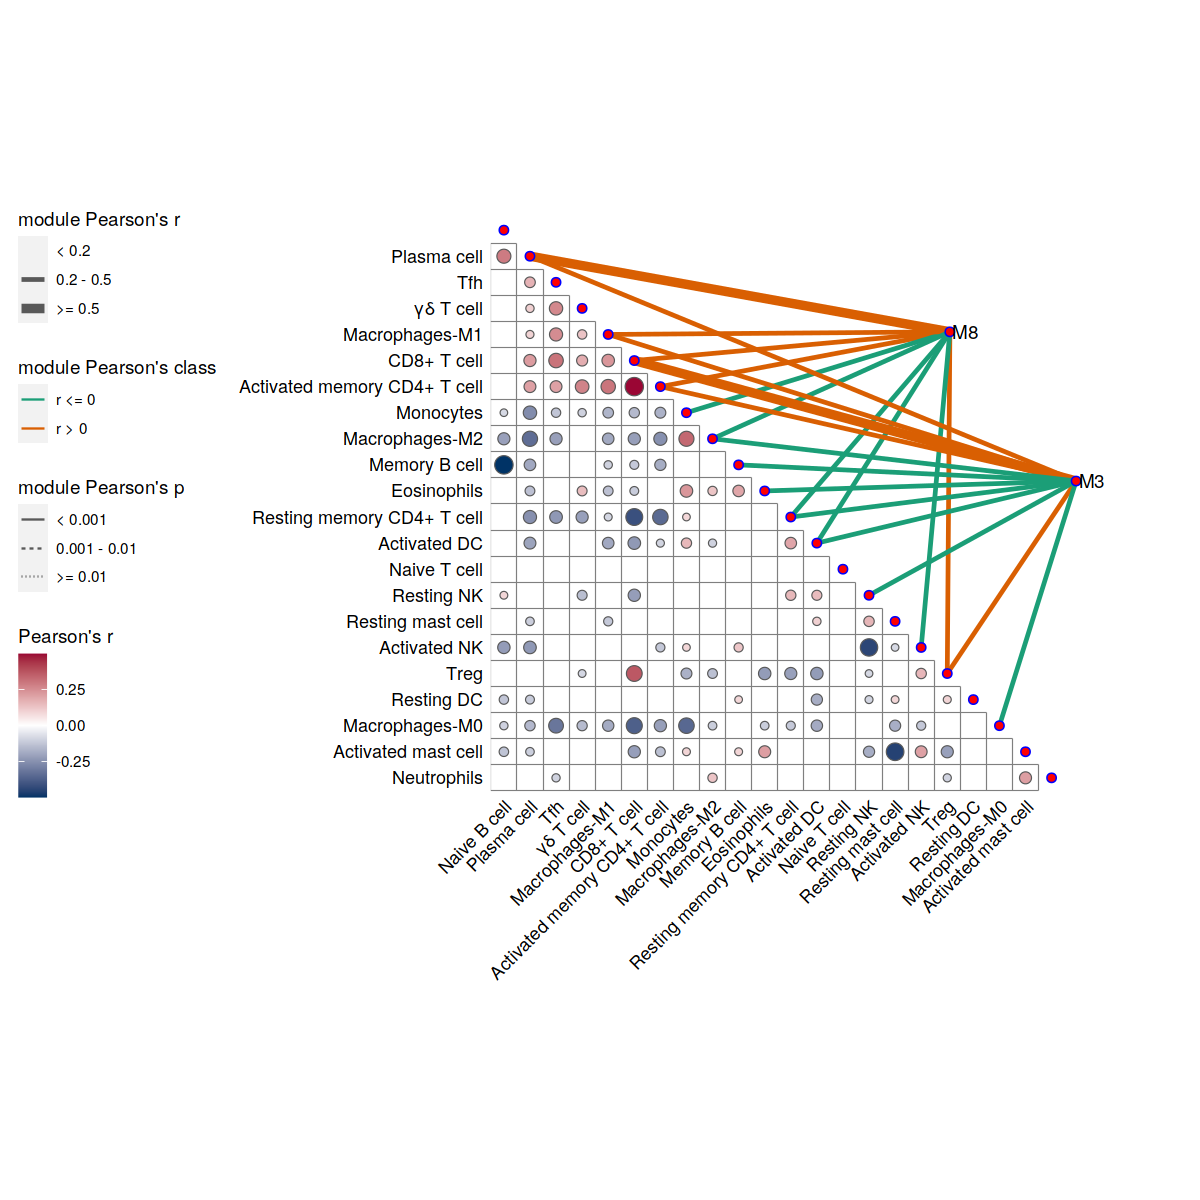

In [29]:
M8M3Cor2LM22

In [30]:
pdf(file = './output/bulk/section_3/1.cibersort_LM22_Heatmap.pdf',width =10,height = 10)
print(M8M3Cor2LM22)
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBound

png 
  2

In [32]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [85]:
p1 <- ggscatter(data =tmp_data,x = 'Plasma cell',y = 'CD8+ T cell',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p2 <- ggscatter(data =tmp_data,x = 'Plasma cell',y = 'Activated memory CD4+ T cell',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p3 <- ggscatter(data =tmp_data,x = 'Plasma cell',y = 'Tfh',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p4 <- ggscatter(data =tmp_data,x = 'Plasma cell',y = 'Macrophages-M1',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p5 <- ggscatter(data =tmp_data,x = 'CD8+ T cell',y = 'Activated memory CD4+ T cell',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p6 <- ggscatter(data =tmp_data,x = 'CD8+ T cell',y = 'Treg',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p7 <- ggscatter(data =tmp_data,x = 'Plasma cell',y = 'Naive B cell',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p8 <- ggscatter(data =tmp_data,x = 'Plasma cell',y = 'Tfh',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))
p9 <- ggscatter(data =tmp_data,x = 'CD8+ T cell',y = 'Macrophages-M1',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "spearman", label.sep = "\\n",color='blue'))


In [34]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



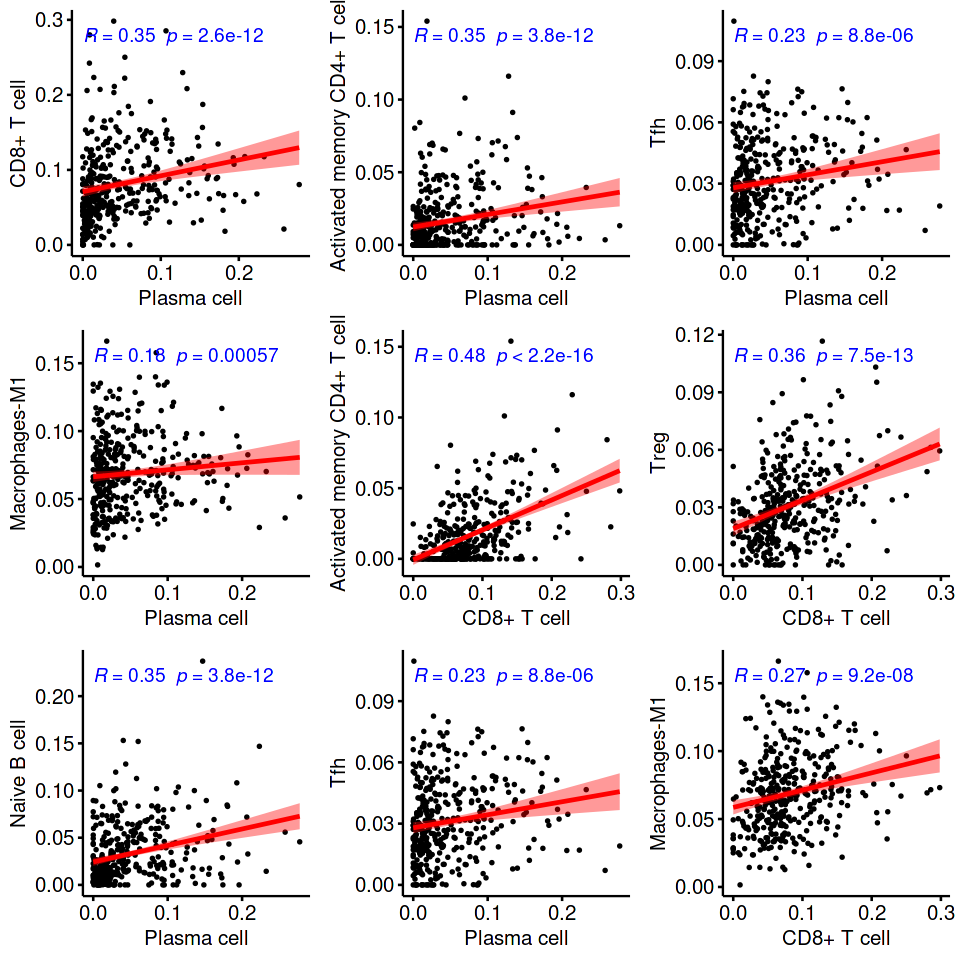

In [87]:
options(repr.plot.height = 8, repr.plot.width = 8)
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,ncol=3)

In [88]:
pdf(file = './output/bulk/section_3/1.cibersort_LM22_ggscatter.pdf',width = 8,height = 8)
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,ncol=3)
dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font metrics unknown for character 0xa”
Warning message in 

png 
  2

## 2.CIBERSORTx for single cell atlas 

In [6]:
CIBERSORTx_immuneCell <- read.csv('/home/data/t060324/jobs/aimin/data/bulk/CIBERSORTx_mergeData2.csv',header = T,sep = ',')

In [4]:
head(CIBERSORTx_immuneCell)

Mixture          B.cell      CAF1       CAF2       CAF3         CAF4      
1 TCGA.23.1120.01A 0.016018656 0.08196585 0.15443041 0.0000000000 0.02621643
2 TCGA.29.1695.01A 0.036235774 0.52022755 0.05702697 0.0000000000 0.00000000
3 TCGA.61.2003.01A 0.000000000 0.52167182 0.03186063 0.0000000000 0.12555359
4 TCGA.13.1404.01A 0.039672250 0.25104132 0.12369059 0.0372685402 0.00000000
5 TCGA.23.1027.01A 0.011086760 0.30488336 0.14419757 0.0004712983 0.00000000
6 TCGA.23.1022.01A 0.001259467 0.00000000 0.28058152 0.0000000000 0.00699572
  CAF5         CD38.NK     CD8.Te     CD8.Tem     ⋯ pDC         Plasma.cell
1 0.0000000000 0.026965240 0.06287633 0.000000000 ⋯ 0.035089009 0.00000000 
2 0.0000000000 0.000000000 0.12663414 0.000000000 ⋯ 0.010470496 0.00000000 
3 0.0000000000 0.000000000 0.20801299 0.000000000 ⋯ 0.008378977 0.00000000 
4 0.0000000000 0.022156710 0.10596354 0.001093635 ⋯ 0.027181085 0.05232419 
5 0.0001075459 0.001361755 0.08530078 0.013454454 ⋯ 0.012112269 0.00000000 
6 0.0000000000 0.000000000 0.05572791 0.008531318 ⋯ 0.032643722 0.00000000 
  Tfh         Th17 Tn         Treg        P.value Correlation RMSE     
1 0.009362166 0    0.07770413 0.000000000 0       0.8932971   0.6815058
2 0.016881123 0    0.06517424 0.002506389 0       0.9010642   0.6964277
3 0.000000000 0    0.09584818 0.019077341 0       0.9013518   0.6966336
4 0.006046231 0    0.09397477 0.014542763 0       0.9324921   0.6314504
5 0.010433680 0    0.08204756 0.008685669 0       0.8799905   0.6926681
6 0.006834421 0    0.18028401 0.006606814 0       0.5484582   0.8912611
  Absolute.score..sig.score.
1 1.628248                  
2 2.143981                  
3 2.273973                  
4 1.520620                  
5 1.687860                  
6 1.011039

In [9]:
library(pheatmap)

In [7]:
myBreaks <- c(seq(-0.6, 0, length.out=ceiling(50/2) + 1), 
              seq(0.5/50, 0.6, length.out=floor(50/2)))
myBreaks

[1] -0.60000000 -0.57600000 -0.55200000 -0.52800000 -0.50400000 -0.48000000
 [7] -0.45600000 -0.43200000 -0.40800000 -0.38400000 -0.36000000 -0.33600000
[13] -0.31200000 -0.28800000 -0.26400000 -0.24000000 -0.21600000 -0.19200000
[19] -0.16800000 -0.14400000 -0.12000000 -0.09600000 -0.07200000 -0.04800000
[25] -0.02400000  0.00000000  0.01000000  0.03458333  0.05916667  0.08375000
[31]  0.10833333  0.13291667  0.15750000  0.18208333  0.20666667  0.23125000
[37]  0.25583333  0.28041667  0.30500000  0.32958333  0.35416667  0.37875000
[43]  0.40333333  0.42791667  0.45250000  0.47708333  0.50166667  0.52625000
[49]  0.55083333  0.57541667  0.60000000

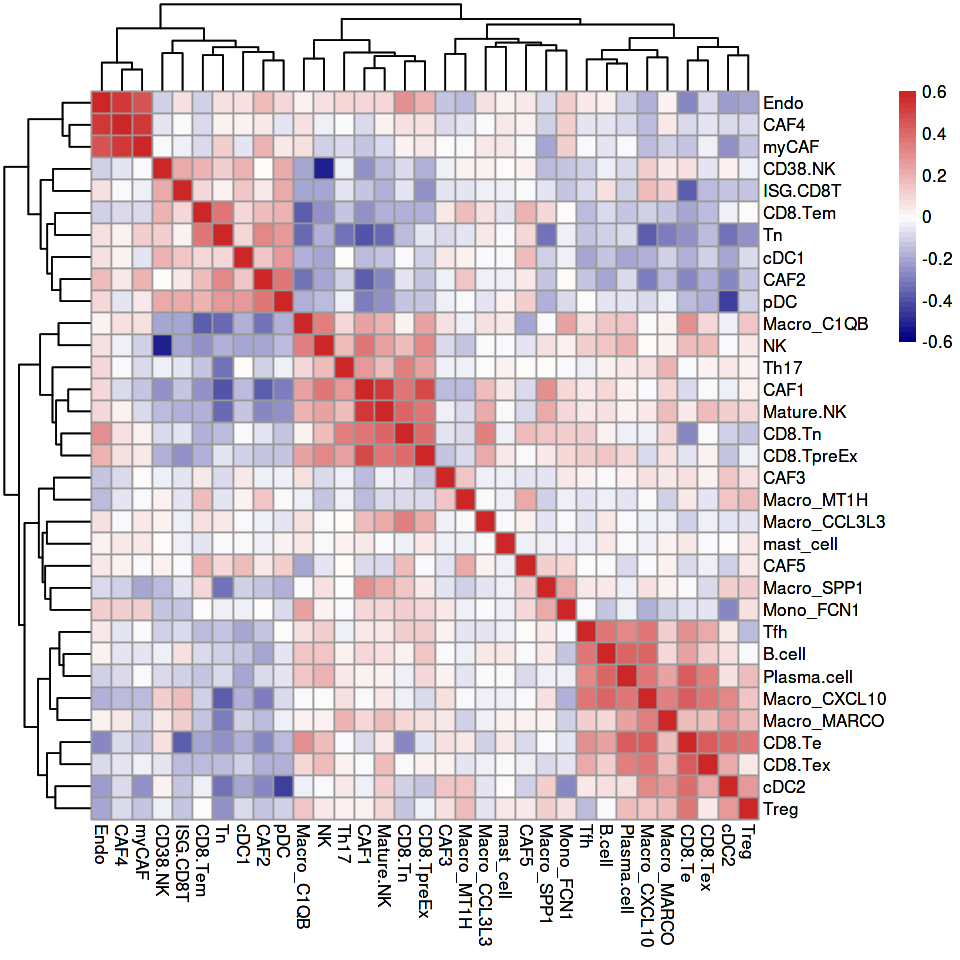

In [8]:
options(repr.plot.height = 8, repr.plot.width = 8)
ph1 <- pheatmap(cor(CIBERSORTx_immuneCell[,c(2:34)]),color = colorRampPalette(c("navy", "white", "firebrick3"))(50),breaks = myBreaks)
ph1

In [9]:
tmp_data <- CIBERSORTx_immuneCell[,c(2:34)]

In [123]:
cor2immuneCell<- list()
for(moduleName in rownames(modules_score)){
    
    cor2immuneCell[[moduleName]] <- do.call(rbind,lapply(colnames(tmp_data),function(HM){
        cor.res <- cor.test(tmp_data[,HM],modules_score[moduleName,])
        return(data.frame(module=moduleName,celltype=HM,cor=cor.res$estimate,p=cor.res$p.value))
    }))
}

In [155]:
cor2immuneCell_sub <- cor2immuneCell[c('M8','M3')]
cor2immuneCell_sub <- do.call(rbind,cor2immuneCell_sub)
head(cor2immuneCell_sub)

module celltype cor        p           
M8.cor  M8     B.cell    0.4620563 1.924370e-21
M8.cor1 M8     CAF1      0.2568092 4.014308e-07
M8.cor2 M8     CAF2     -0.2628962 2.071995e-07
M8.cor3 M8     CAF3      0.2159976 2.222235e-05
M8.cor4 M8     CAF4     -0.1308860 1.075246e-02
M8.cor5 M8     CAF5     -0.1221124 1.739128e-02

In [156]:
mantel  <- cor2immuneCell_sub %>%
  mutate(rd = cut(abs(cor), breaks = c(-Inf, 0.3, 0.5, Inf),
                  labels = c("< 0.3", "0.3 - 0.5", ">= 0.5")),
         lty = cut(cor, breaks = c(-Inf, 0,  Inf),
                  labels = c("r <= 0", "r > 0")),
         pd = cut(p, breaks = c(-Inf, 0.001, 0.01, Inf),
                  labels = c("< 0.001", "0.001 - 0.01", ">= 0.01")))


In [157]:
options(repr.plot.height = 10, repr.plot.width = 10)
set_scale()
M8M3Cor2LM22 <- quickcor(tmp_data, cor.test = TRUE,cluster = T,type = "lower", show.diag = FALSE,,cluster.type = "all") +  
geom_circle2(data = get_data(p.value < 0.05, type = "lower"))+ scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
anno_link(aes(colour = lty, linetype = pd,size=rd), data = mantel) +#定义连线 
  scale_size_manual(values = c(0, 1, 2))+ 
scale_colour_manual(values = c( "#1B9E77","#D95F02"))+ 
scale_linetype_manual(values = c("solid",'dashed', "dotted")) +
  guides(size = guide_legend(title = "module Pearson's r",#定义图例 
                             order = 2), 
         colour = guide_legend(title = "module Pearson's class",  
                               order = 3), 
         linetype = guide_legend(title = "module Pearson's p",  
                               order = 4),
         fill = guide_colorbar(title = "Pearson's r", order = 5)) 

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



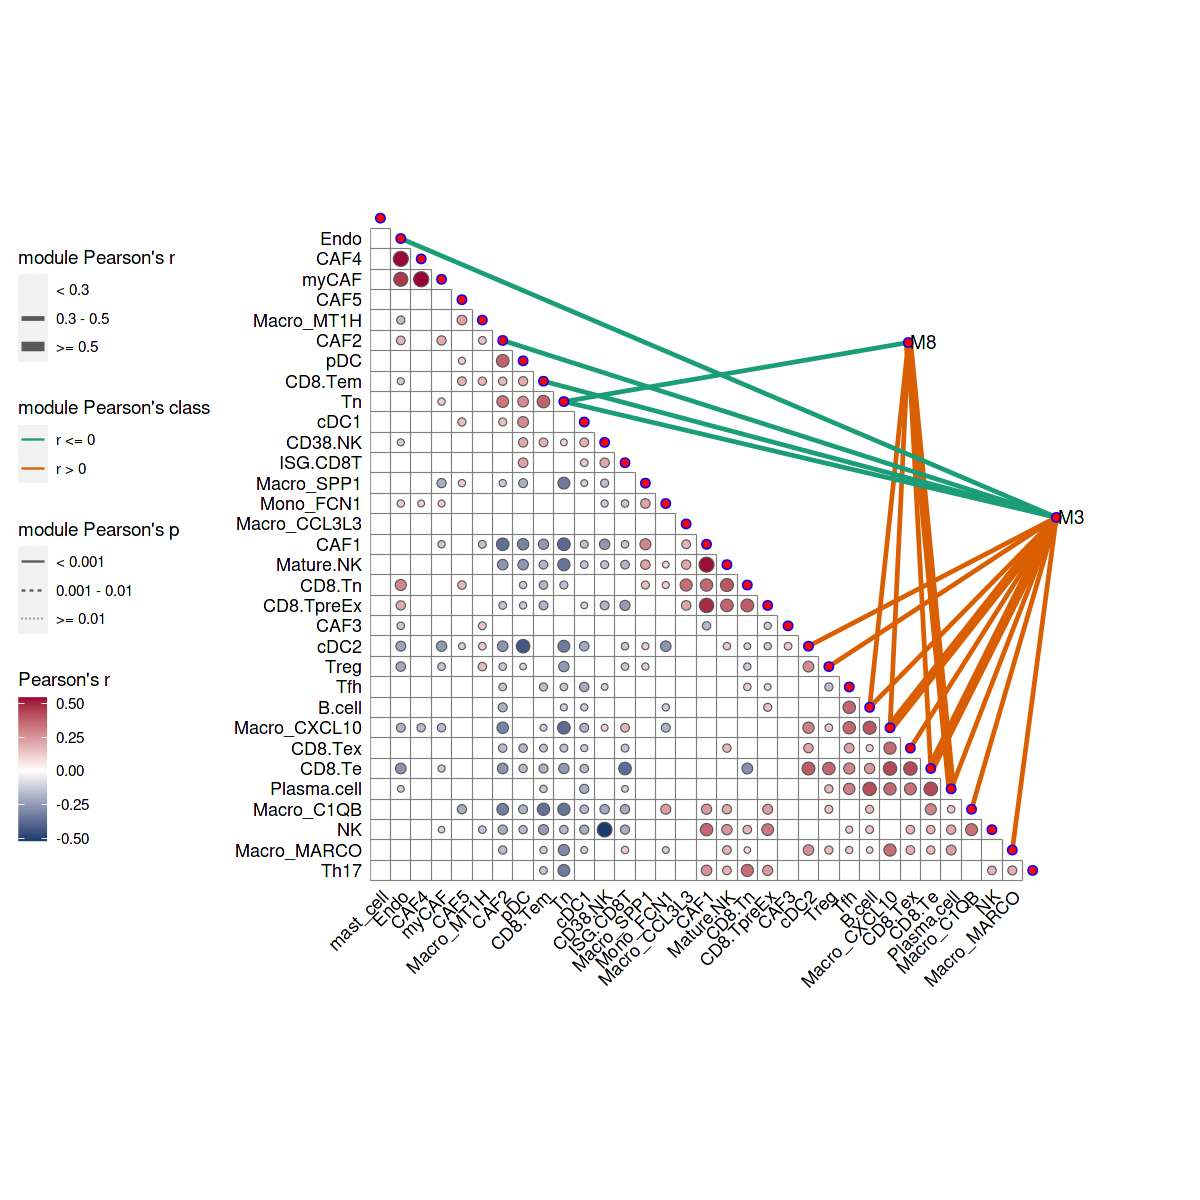

In [158]:
M8M3Cor2LM22

In [159]:
pdf(file = './output/bulk/section_3/1.cibersort_scLM27_Heatmap.pdf',width = 10,height =10)
print(M8M3Cor2LM22)
dev.off()

png 
  2

In [152]:
cor2immuneCell_sub <- cor2immuneCell[c('M53','M7')]
cor2immuneCell_sub <- do.call(rbind,cor2immuneCell_sub)
mantel  <- cor2immuneCell_sub %>%
  mutate(rd = cut(abs(cor), breaks = c(-Inf, 0.3, 0.5, Inf),
                  labels = c("< 0.3", "0.3 - 0.5", ">= 0.5")),
         lty = cut(cor, breaks = c(-Inf, 0,  Inf),
                  labels = c("r <= 0", "r > 0")),
         pd = cut(p, breaks = c(-Inf, 0.001, 0.01, Inf),
                  labels = c("< 0.001", "0.001 - 0.01", ">= 0.01")))


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



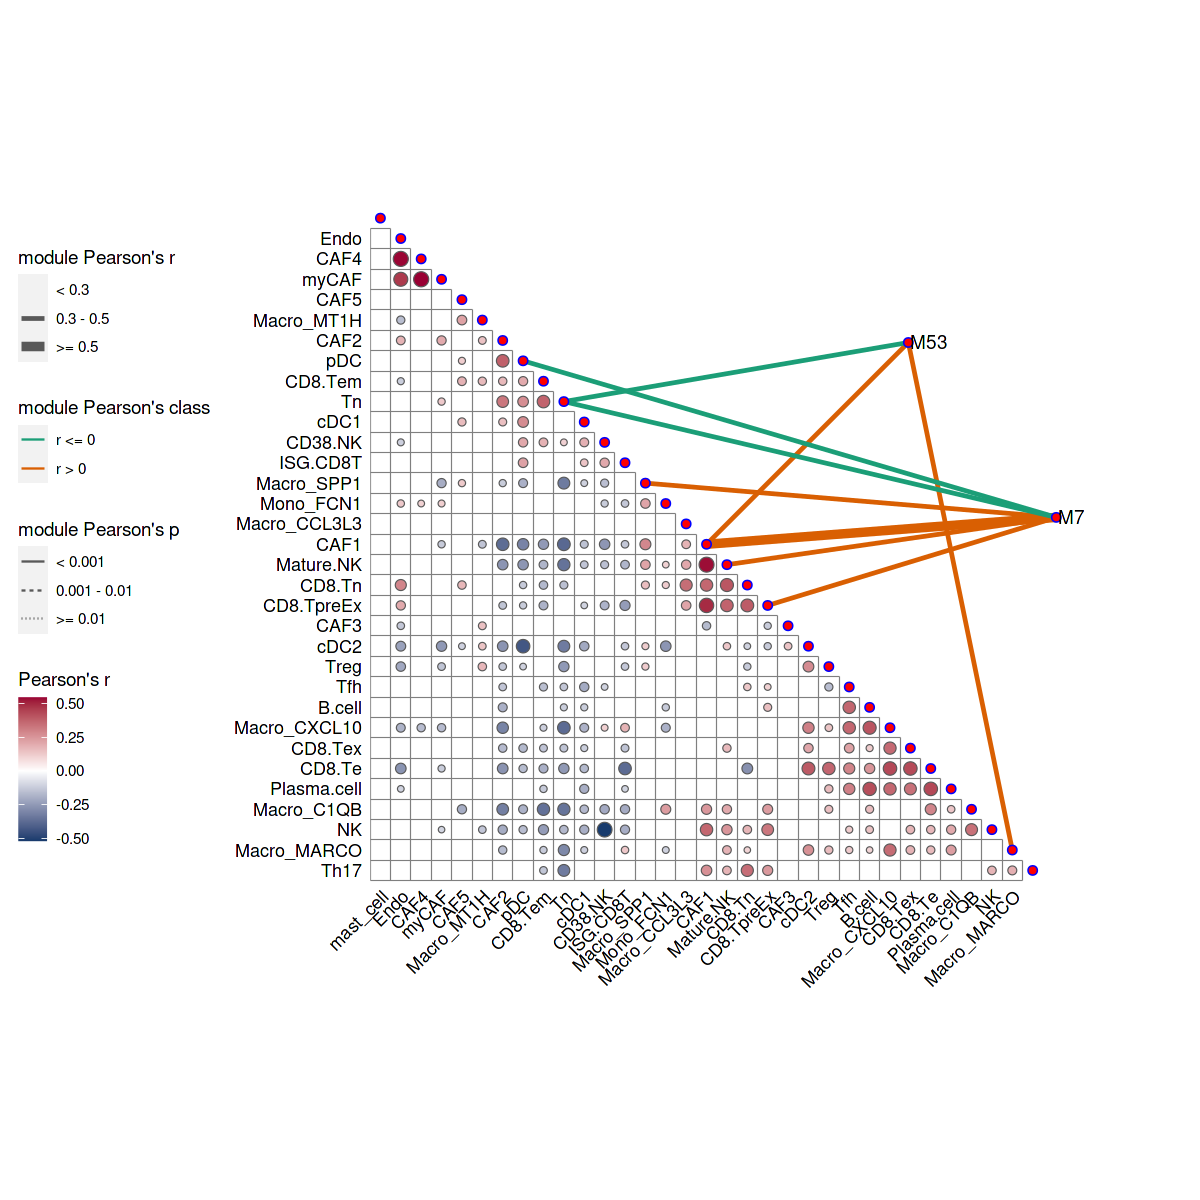

In [153]:
options(repr.plot.height = 10, repr.plot.width = 10)
set_scale()
M7M53Cor2LM22 <- quickcor(tmp_data, cor.test = TRUE,cluster = T,type = "lower", show.diag = FALSE,,cluster.type = "all") +  
geom_circle2(data = get_data(p.value < 0.05, type = "lower"))+ scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
anno_link(aes(colour = lty, linetype = pd,size=rd), data = mantel) +#定义连线 
  scale_size_manual(values = c(0, 1, 2))+ 
scale_colour_manual(values = c( "#1B9E77","#D95F02"))+ 
scale_linetype_manual(values = c("solid",'dashed', "dotted")) +
  guides(size = guide_legend(title = "module Pearson's r",#定义图例 
                             order = 2), 
         colour = guide_legend(title = "module Pearson's class",  
                               order = 3), 
         linetype = guide_legend(title = "module Pearson's p",  
                               order = 4),
         fill = guide_colorbar(title = "Pearson's r", order = 5)) 
M7M53Cor2LM22

In [154]:
pdf(file = './output/bulk/section_3/1.cibersort_scLM27_Heatmap_M7M53.pdf',width = 10,height =10)
print(M7M53Cor2LM22)
dev.off()

png 
  2

## 3.1 Prognostic effect of immune cell infiltration(TCGA)

In [5]:
load(file = './data/bulk/dataMerge_subset.RData')

In [6]:
rownames(CIBERSORTx_immuneCell) <- CIBERSORTx_immuneCell[,1]
CIBERSORTx_immuneCell <- CIBERSORTx_immuneCell[,-1]
rownames(CIBERSORTx_immuneCell) <- gsub(pattern = '\\.',replacement = '-',rownames(CIBERSORTx_immuneCell))
rownames(CIBERSORTx_immuneCell) <- substr(rownames(CIBERSORTx_immuneCell),start = 1,stop = 15)
CIBERSORTx_immuneCell[1:6,1:6]

B.cell      CAF1       CAF2       CAF3         CAF4      
TCGA-23-1120-01 0.016018656 0.08196585 0.15443041 0.0000000000 0.02621643
TCGA-29-1695-01 0.036235774 0.52022755 0.05702697 0.0000000000 0.00000000
TCGA-61-2003-01 0.000000000 0.52167182 0.03186063 0.0000000000 0.12555359
TCGA-13-1404-01 0.039672250 0.25104132 0.12369059 0.0372685402 0.00000000
TCGA-23-1027-01 0.011086760 0.30488336 0.14419757 0.0004712983 0.00000000
TCGA-23-1022-01 0.001259467 0.00000000 0.28058152 0.0000000000 0.00699572
                CAF5        
TCGA-23-1120-01 0.0000000000
TCGA-29-1695-01 0.0000000000
TCGA-61-2003-01 0.0000000000
TCGA-13-1404-01 0.0000000000
TCGA-23-1027-01 0.0001075459
TCGA-23-1022-01 0.0000000000

In [7]:

colnames(TCGA_OV_TPM_log) <- gsub(pattern = '\\.',replacement = '-',colnames(TCGA_OV_TPM_log))
colnames(TCGA_OV_TPM_log) <- substr(colnames(TCGA_OV_TPM_log),start = 1,stop = 15)
head(TCGA_OV_TPM_log)

TCGA-23-1120-01 TCGA-29-1695-01 TCGA-61-2003-01 TCGA-13-1404-01
A1BG     1.06722213      0.2307168       0.50202920      0.07290544     
A1BG-AS1 2.52390960      1.2745553       1.52991550      0.47540154     
A1CF     0.04707233      0.0000000       0.02016811      0.03086242     
A2M      6.14355060      7.7005029       8.06920780      6.31715801     
A2M-AS1  2.37782336      2.2126876       2.62292769      2.38276865     
A2ML1    0.13981025      3.5469300       0.08638179      0.17369815     
         TCGA-23-1027-01 TCGA-23-1022-01 TCGA-61-2088-01 TCGA-23-1123-01
A1BG     0.1486039       0.2999975       1.15777202      0.42510266     
A1BG-AS1 0.6272860       1.4425001       2.32829345      1.36069197     
A1CF     0.0000000       0.0000000       0.04058685      0.00978721     
A2M      6.8167526       5.5993737       5.92719334      7.16712882     
A2M-AS1  1.5853730       0.4688678       2.34870251      3.73024998     
A2ML1    0.8636846       0.4770556       0.31483222      1.62552602     
         TCGA-61-1725-01 TCGA-61-2009-01 ⋯ TCGA-30-1714-01 TCGA-57-1582-01
A1BG     0.230178045     0.193178211     ⋯ 0.05020447      0.47510744     
A1BG-AS1 0.994521186     1.296114676     ⋯ 0.20460757      1.84543778     
A1CF     0.008649478     0.007168069     ⋯ 0.00000000      0.02118276     
A2M      6.974891087     6.641975547     ⋯ 4.31944866      6.16376219     
A2M-AS1  2.353235290     1.609361585     ⋯ 1.83038175      0.58187211     
A2ML1    0.044924037     0.357981396     ⋯ 0.20839013      0.35476183     
         TCGA-61-2012-01 TCGA-13-1510-01 TCGA-VG-A8LO-01 TCGA-23-2078-01
A1BG     0.6360569       0.3140876       0.15035205      0.4172710      
A1BG-AS1 2.1827164       0.8795826       0.39515911      1.1091275      
A1CF     0.0000000       0.0000000       0.04341087      0.0323675      
A2M      7.6938450       6.3025933       5.38655533      6.9566732      
A2M-AS1  4.5718944       3.1568520       2.08016433      2.1631650      
A2ML1    0.3123927       0.9255011       0.27605813      0.8484484      
         TCGA-09-1666-01 TCGA-13-1495-01 TCGA-61-2110-01 TCGA-24-2280-01
A1BG     0.06457093      0.3466818       0.36766431      0.54503342     
A1BG-AS1 0.52923217      0.8973886       1.37029285      1.68698031     
A1CF     0.01370886      0.0000000       0.08480323      0.03893772     
A2M      8.18237396      6.6996957       5.07593488      8.10377344     
A2M-AS1  2.07747854      2.0303065       1.02894926      3.14374571     
A2ML1    0.42112348      0.3281834       0.47708507      1.57459069

In [8]:
dim(TCGA_OV_TPM_log)

[1] 32936   379

In [27]:
gene2CellType <- cor(x = CIBERSORTx_immuneCell,y = t(TCGA_OV_TPM_log),method = 'spearman')


In [107]:
?cor

In [185]:
gene2CellType[1:6,1:6]

A1BG         A1BG-AS1    A1CF        A2M         A2M-AS1     A2ML1      
B.cell -0.003496394  0.08583834 -0.03979504  0.19090233  0.06496369  0.03943116
CAF1    0.200529299  0.23958131  0.07028682  0.28400940 -0.04082705 -0.04387899
CAF2    0.008503669 -0.13360799  0.13196457 -0.52968371  0.09343191  0.01096805
CAF3   -0.273734705 -0.26560575 -0.14578220 -0.10407955 -0.14374093 -0.09064419
CAF4    0.041152669  0.01368751  0.13875343  0.02818601  0.25546417  0.11567274
CAF5   -0.092698834 -0.11692347  0.06846578 -0.21900811  0.08883708 -0.09751133

In [186]:
rownames(gene2CellType)

[1] "B.cell"       "CAF1"         "CAF2"         "CAF3"         "CAF4"        
 [6] "CAF5"         "CD38.NK"      "CD8.Te"       "CD8.Tem"      "CD8.Tex"     
[11] "CD8.Tn"       "CD8.TpreEx"   "cDC1"         "cDC2"         "Endo"        
[16] "ISG.CD8T"     "Macro_C1QB"   "Macro_CCL3L3" "Macro_CXCL10" "Macro_MARCO" 
[21] "Macro_MT1H"   "Macro_SPP1"   "mast_cell"    "Mature.NK"    "Mono_FCN1"   
[26] "myCAF"        "NK"           "pDC"          "Plasma.cell"  "Tfh"         
[31] "Th17"         "Tn"           "Treg"         "P.value"      "Correlation" 
[36] "RMSE"

In [229]:
i= 'CD8.Tex'
geneCor <- gene2CellType[i,]
geneCor <- sort(geneCor,decreasing = T)
head(geneCor,300)
geneCor['CXCL13']

CCL5        CD8A        GZMH        GZMA       CXCL9      TRBV28 
  0.4917111   0.4824888   0.4801894   0.4801781   0.4748876   0.4736479 
       TRAC       SIRPG        CD3E       CXCR6   LINC02446        CD3D 
  0.4727801   0.4711147   0.4692073   0.4682598   0.4674794   0.4633866 
        CD2      GPR171       TRBC2        NKG7   LINC02195        IFNG 
  0.4607433   0.4598376   0.4576556   0.4549858   0.4549685   0.4511648 
      CD247   LINC00426      SH2D1A        IL21  AC243829.4       FASLG 
  0.4464378   0.4446563   0.4442071   0.4440408   0.4434398   0.4418147 
  LINC01871   LINC02084      SLAMF6        SLA2        SIT1        CD3G 
  0.4415856   0.4413448   0.4405259   0.4400304   0.4399026   0.4389494 
      IL2RG        CD96       TBX21        CD8B     ANKRD22      THEMIS 
  0.4388625   0.4386990   0.4383299   0.4351912   0.4333684   0.4331236 
     PYHIN1       TIGIT       TRAT1        GZMM      SLAMF1        RHOH 
  0.4324590   0.4313370   0.4309268   0.4290953   0.4290136   0.4286563 
      TRBC1     TRBV7-9         ITK         LY9        PRF1         CD7 
  0.4282353   0.4271572   0.4270466   0.4241510   0.4240315   0.4227698 
      PDCD1       CXCR3        GZMB        CTSW        CD27         LCK 
  0.4221548   0.4210933   0.4188032   0.4181300   0.4175007   0.4174655 
     TRGV10        CD48       CTLA4      SLAMF7     PLA2G2D       TRAV4 
  0.4171677   0.4161113   0.4157963   0.4149003   0.4148022   0.4144885 
      KLRB1      SLAMF8        CD52       CD244        ICOS   LINC01934 
  0.4142818   0.4127811   0.4126559   0.4120898   0.4119160   0.4112011 
    TRG-AS1     IL18RAP      CXCL13       ZAP70    TRAV13-1       SCML4 
  0.4102567   0.4094918   0.4082684   0.4076244   0.4059685   0.4057890 
      TRGC2       STAT4    ADAMDEC1       SAMD3        LIPM        HCST 
  0.4056555   0.4045637   0.4028583   0.4008606   0.4007637   0.4006191 
   PDCD1LG2        GZMK      OR2I1P        GBP5  AL591468.1      P2RY10 
  0.4000738   0.4000184   0.3998736   0.3991090   0.3988612   0.3973859 
      IGSF6       GRAP2       EOMES        GFI1      TRAV16        LAG3 
  0.3971997   0.3970393   0.3955708   0.3955603   0.3930204   0.3927016 
 AC243960.1         LYZ      ZNF683       IL21R        XCL2  AC096734.1 
  0.3925437   0.3921026   0.3914744   0.3910048   0.3882506   0.3878012 
      TRGC1    TRBV20-1        FYB1       IL2RB    HLA-DQA1       KLRD1 
  0.3872502   0.3870722   0.3859463   0.3854920   0.3854265   0.3851094 
    TRBV4-1     TRBV5-1  AC004585.1        CST7       S1PR4      TESPA1 
  0.3843495   0.3843157   0.3841559   0.3839752   0.3836450   0.3834452 
      IKZF3        FGL2     TRAV8-6        CCL4       PTPRC    ARHGAP15 
  0.3834268   0.3833148   0.3831920   0.3830936   0.3830835   0.3830786 
     PTPN22    TRAV12-3        C1QA        AIM2      FCER1G  AL162414.1 
  0.3827758   0.3825603   0.3819047   0.3813268   0.3812049   0.3810831 
     TRBV19    TRAV13-2       CYTIP        CCR5      TRAV19      TRAV21 
  0.3809260   0.3803220   0.3803196   0.3801768   0.3799230   0.3796969 
       C1QB         CD5       TRBV2        GMFG      TRAV17       TRAV3 
  0.3787173   0.3786052   0.3785619   0.3778687   0.3774365   0.3764830 
    TRBV3-1       CD226    TRAV26-1    TNFSF13B       ICAM3   LINC01943 
  0.3749033   0.3748803   0.3744570   0.3734418   0.3727552   0.3721740 
     FCGR1A    C15orf53       TRAV5    TRAV12-1        LCP2       PTPN7 
  0.3717731   0.3716036   0.3709429   0.3707589   0.3706809   0.3706554 
       JAML        RAC2      GPR174       VAMP5    C16orf54    IGLV1-47 
  0.3703402   0.3703054   0.3701125   0.3698297   0.3692469   0.3685327 
   TRAV38-1      GIMAP7      CD40LG     TRAV8-4     UBASH3A        CD53 
  0.3682296   0.3676948   0.3673480   0.3673098   0.3665521   0.3660988 
     LILRB4      TRBV18        CD86      LILRB2       EVI2B         UBD 
  0.3659084   0.3655642   0.3653841   0.3649826   0.3649103   0.3648794 
     TYROBP       ITGAL    HLA-DPB1       ABCD2    APOBEC3H      

CXCL13 
0.4082684

In [51]:
tail(geneCor,300)

NAP1L1 C15orf59-AS1   AC114803.1         B9D1        FXYD4        EFNB3 
  -0.2241557   -0.2241772   -0.2241846   -0.2242175   -0.2242400   -0.2246909 
       ASXL3         MYT1    LINC01248      TMEM145         DRC3   AL732292.2 
  -0.2247589   -0.2248741   -0.2249637   -0.2249763   -0.2253048   -0.2253232 
        ALPP      ABHD14A   AL121899.1   AC010729.1   AL450270.1    GLIS3-AS1 
  -0.2253409   -0.2253713   -0.2258303   -0.2259887   -0.2261951   -0.2264064 
 RNU6ATAC35P        CAMKV      COLEC11       CHRNA4        WASF1       ZNF814 
  -0.2265133   -0.2268544   -0.2268980   -0.2272675   -0.2273633   -0.2275124 
     ZCCHC18        DDX25       ELOVL2        SAMD5       FAM84A       CAMKMT 
  -0.2275642   -0.2276796   -0.2279196   -0.2279345   -0.2280579   -0.2283727 
  AL136454.1         UPK2        EFR3B      CCDC146        WDR35        RPS14 
  -0.2284167   -0.2284304   -0.2285692   -0.2286153   -0.2287797   -0.2288890 
        RPS3        UBXN8        ERCC1       SPRR2F        SUGT1         GPC1 
  -0.2289063   -0.2293605   -0.2294747   -0.2295391   -0.2297355   -0.2298968 
      TUBB2B       SNRPD2     GPC6-AS1       LRRC23        GDF10        TNNI1 
  -0.2299614   -0.2301106   -0.2301568   -0.2302857   -0.2303412   -0.2304340 
        GPC6   AL035701.1         EYA4       ZNF423       DUSP15        SNHG7 
  -0.2306570   -0.2307504   -0.2307985   -0.2310701   -0.2311607   -0.2314816 
       MORN5      C2orf40   AC002456.1       COL2A1        HMGA2        HHATL 
  -0.2314951   -0.2316006   -0.2320379   -0.2321362   -0.2325221   -0.2325894 
       RPS27   AC084036.1      C2orf70        RPS13         SNCB       ATP1A2 
  -0.2326838   -0.2330945   -0.2331024   -0.2331187   -0.2331693   -0.2339212 
     CCDC173         PRTG   AC010325.1   AC016957.2    LINC01143        SNORC 
  -0.2340358   -0.2340467   -0.2341041   -0.2342226   -0.2342723   -0.2346340 
       RPL19        LTBP4       PNMA8A     MIR202HG        VIPR2   AC022306.2 
  -0.2350178   -0.2351022   -0.2356069   -0.2359458   -0.2359986   -0.2361035 
     SOSTDC1      GAL3ST3        FOXN4   AC012409.1        SMIM6         NRTN 
  -0.2362765   -0.2364501   -0.2365226   -0.2366130   -0.2367122   -0.2372721 
        NME4        CCDC8   AC009414.2         PTMS         PEMT        RBM26 
  -0.2374505   -0.2375757   -0.2377858   -0.2379083   -0.2380566   -0.2382213 
       NACA2        LRTM2   AC005076.1       PHF21B         RPL4   AC145207.5 
  -0.2382490   -0.2383418   -0.2386983   -0.2387510   -0.2389736   -0.2389962 
     ZNF286B        FGFR3     NAPA-AS1     CABCOCO1        IFT22         CA14 
  -0.2393353   -0.2393650   -0.2394364   -0.2394626   -0.2394926   -0.2394953 
  AC011365.2   AC069234.4   SUCLA2-AS1          KCP       LEFTY1   AC078860.1 
  -0.2400316   -0.2404341   -0.2404341   -0.2406423   -0.2411850   -0.2412601 
       MICU3         RPRM     BACE1-AS        CRLF1        COX7C       RNF224 
  -0.2413697   -0.2414262   -0.2414761   -0.2416809   -0.2416853   -0.2417562 
        RPS9        EIF3F       CSRNP3         USP2   AC090673.1        ITFG2 
  -0.2418290   -0.2418290   -0.2418523   -0.2419895   -0.2420587   -0.2423337 
  AC067747.1         UFC1       SORBS2        MYLPF   AC084824.5       COL9A3 
  -0.2423401   -0.2424533   -0.2427014   -0.2428249   -0.2429072   -0.2433737 
  AC244517.1       IGDCC3          F10         MST1       RPS15A      ALDH3A1 
  -0.2434834   -0.2434982   -0.2435967   -0.2438470   -0.2441021   -0.2442424 
       RPL38        PTOV1       NANOS3       ZNF660        RPS25   ERICH6-AS1 
  -0.2442948   -0.2446038   -0.2451996   -0.2453265   -0.2454251   -0.2454728 
      RPL27A         CIB4   AC135178.5     C10orf82         NEK5        TEKT3 
  -0.2456357   -0.2456631   -0.2456925   -0.2460635   -0.2463553   -0.2463697 
  AC084782.3       RPL35A   AL354872.2       EMX2OS    LINC01976       ALKBH2 
  -0.2472622   -0.2480145   -0.2482976   -0.2484965   -0.2487737   -0.2491799 
  AC009955.4         EBPL       PNMA8C   AL353747.2     

In [230]:
library(pheatmap)

In [231]:
cor(CIBERSORTx_immuneCell[,c(1:33)])[,'CD8.Tex']

B.cell         CAF1         CAF2         CAF3         CAF4         CAF5 
 0.119522991 -0.007954057 -0.168362141  0.030687864 -0.057872449 -0.047157047 
     CD38.NK       CD8.Te      CD8.Tem      CD8.Tex       CD8.Tn   CD8.TpreEx 
-0.071916461  0.431297965 -0.145602436  1.000000000 -0.010317406  0.022721230 
        cDC1         cDC2         Endo     ISG.CD8T   Macro_C1QB Macro_CCL3L3 
-0.119134649  0.211381238 -0.080072608 -0.147183425  0.099114661 -0.024322191 
Macro_CXCL10  Macro_MARCO   Macro_MT1H   Macro_SPP1    mast_cell    Mature.NK 
 0.357063752  0.180726022 -0.052960387 -0.081319093 -0.012653516  0.165337882 
   Mono_FCN1        myCAF           NK          pDC  Plasma.cell          Tfh 
-0.069163697 -0.040959697  0.176815140 -0.172860410  0.340395088  0.222882270 
        Th17           Tn         Treg 
 0.027530795 -0.147508966  0.044435260

In [9]:
bothSample <- intersect(rownames(CIBERSORTx_immuneCell),dataMerge_subset$aliquot_barcode)

dataMerge_subset2 <- dataMerge_subset[match(bothSample,dataMerge_subset$aliquot_barcode),]
dataMerge_subset2$HRD_status <- ifelse(dataMerge_subset2$HRD>=41,'HRD','HRP')
CIBERSORTx_immuneCell <- CIBERSORTx_immuneCell[bothSample,]
tmp_data <- dataMerge_subset2

In [10]:
head(tmp_data)

aliquot_barcode patient_id   OS.event age anatomic_organ_subdivision
204 TCGA-23-1120-01 TCGA-23-1120 0        60  Right                     
472 TCGA-61-2003-01 TCGA-61-2003 0        53  Bilateral                 
133 TCGA-13-1404-01 TCGA-13-1404 0        48  Bilateral                 
191 TCGA-23-1027-01 TCGA-23-1027 1        48  Right                     
187 TCGA-23-1022-01 TCGA-23-1022 1        67  Left                      
479 TCGA-61-2088-01 TCGA-61-2088 0        51  Bilateral                 
    histological_type         person_neoplasm_cancer_status
204 Serous Cystadenocarcinoma null                         
472 Serous Cystadenocarcinoma WITH TUMOR                   
133 Serous Cystadenocarcinoma TUMOR FREE                   
191 Serous Cystadenocarcinoma null                         
187 Serous Cystadenocarcinoma WITH TUMOR                   
479 Serous Cystadenocarcinoma TUMOR FREE                   
    primary_therapy_outcome race  site_of_tumor_first_recurrence ⋯ COSMIC_29   
204 null                    WHITE null                           ⋯           NA
472 PROGRESSIVE DISEASE     WHITE null                           ⋯ 8.910357e-01
133 COMPLETE RESPONSE       WHITE null                           ⋯ 6.802505e+00
191 PROGRESSIVE DISEASE     WHITE null                           ⋯ 5.913000e-15
187 COMPLETE RESPONSE       WHITE METASTASIS                     ⋯ 0.000000e+00
479 null                    WHITE null                           ⋯ 0.000000e+00
    COSMIC_30 HRD_status2    Subtype_mRNA   Stromal_score Immune_score
204        NA NA             Immunoreactive  -430.28        453.34    
472 0.0000000 HR_deficiency  Mesenchymal          NA            NA    
133 0.0000000 HR_deficiency  Proliferative        NA            NA    
191 0.0000000 HR_proficiency Differentiated  -160.52        243.07    
187 0.0000000 HR_deficiency  Proliferative        NA            NA    
479 0.1936976 HR_proficiency Proliferative  -1477.91      -1490.94    
    ESTIMATE_score class TMB       mergeClass              
204    23.06       01           NA NA_unknow               
472       NA       NA    2.8942175 HR_deficiency_unknow    
133       NA       NA    1.6247095 HR_deficiency_Sensitive 
191    82.54       01    1.6390732 HR_proficiency_Sensitive
187       NA       NA    5.5985679 HR_deficiency_Sensitive 
479 -2968.85       01    0.5050415 HR_proficiency_unknow

In [11]:
exp_data <- TCGA_OV_TPM_log[,bothSample]
head(exp_data)

TCGA-23-1120-01 TCGA-61-2003-01 TCGA-13-1404-01 TCGA-23-1027-01
A1BG     1.06722213      0.50202920      0.07290544      0.1486039      
A1BG-AS1 2.52390960      1.52991550      0.47540154      0.6272860      
A1CF     0.04707233      0.02016811      0.03086242      0.0000000      
A2M      6.14355060      8.06920780      6.31715801      6.8167526      
A2M-AS1  2.37782336      2.62292769      2.38276865      1.5853730      
A2ML1    0.13981025      0.08638179      0.17369815      0.8636846      
         TCGA-23-1022-01 TCGA-61-2088-01 TCGA-23-1123-01 TCGA-61-1725-01
A1BG     0.2999975       1.15777202      0.42510266      0.230178045    
A1BG-AS1 1.4425001       2.32829345      1.36069197      0.994521186    
A1CF     0.0000000       0.04058685      0.00978721      0.008649478    
A2M      5.5993737       5.92719334      7.16712882      6.974891087    
A2M-AS1  0.4688678       2.34870251      3.73024998      2.353235290    
A2ML1    0.4770556       0.31483222      1.62552602      0.044924037    
         TCGA-61-2009-01 TCGA-24-1417-01 ⋯ TCGA-29-1777-01 TCGA-30-1714-01
A1BG     0.193178211     0.8669520       ⋯ 0.1508743       0.05020447     
A1BG-AS1 1.296114676     3.0594254       ⋯ 1.0750820       0.20460757     
A1CF     0.007168069     0.0000000       ⋯ 0.0000000       0.00000000     
A2M      6.641975547     7.9395263       ⋯ 5.6798313       4.31944866     
A2M-AS1  1.609361585     1.5521296       ⋯ 1.5501072       1.83038175     
A2ML1    0.357981396     0.1122809       ⋯ 0.3811305       0.20839013     
         TCGA-57-1582-01 TCGA-61-2012-01 TCGA-13-1510-01 TCGA-23-2078-01
A1BG     0.47510744      0.6360569       0.3140876       0.4172710      
A1BG-AS1 1.84543778      2.1827164       0.8795826       1.1091275      
A1CF     0.02118276      0.0000000       0.0000000       0.0323675      
A2M      6.16376219      7.6938450       6.3025933       6.9566732      
A2M-AS1  0.58187211      4.5718944       3.1568520       2.1631650      
A2ML1    0.35476183      0.3123927       0.9255011       0.8484484      
         TCGA-09-1666-01 TCGA-13-1495-01 TCGA-61-2110-01 TCGA-24-2280-01
A1BG     0.06457093      0.3466818       0.36766431      0.54503342     
A1BG-AS1 0.52923217      0.8973886       1.37029285      1.68698031     
A1CF     0.01370886      0.0000000       0.08480323      0.03893772     
A2M      8.18237396      6.6996957       5.07593488      8.10377344     
A2M-AS1  2.07747854      2.0303065       1.02894926      3.14374571     
A2ML1    0.42112348      0.3281834       0.47708507      1.57459069

In [18]:
tmp_data$CD27 <- exp_data['CD27',]
tmp_data$CXCL10 <- exp_data['CXCL10',]
tmp_data$CXCL11 <- exp_data['CXCL11',]
tmp_data$CXCL9 <- exp_data['CXCL9',]
tmp_data$CXCL13 <- exp_data['CXCL13',]
tmp_data$CXCL16 <- exp_data['CXCL16',]
tmp_data$CXCR3 <- exp_data['CXCR3',]
tmp_data$CXCR5 <- exp_data['CXCR5',]
tmp_data$CXCR6 <- exp_data['CXCR6',]
tmp_data$CD38 <- exp_data['CD38',]
tmp_data$IFNG <- exp_data['IFNG',]

In [19]:
library(forestplot)

In [20]:
library(survminer)
require("survival")

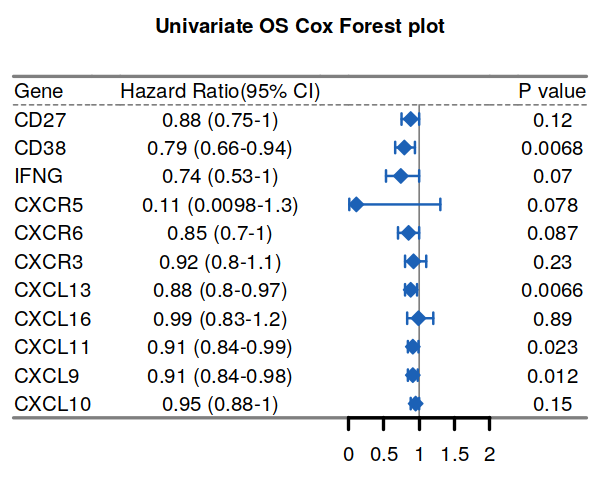

In [21]:
univ_formulas <- sapply(c('CD27','CD38','IFNG','CXCR5','CXCR6','CXCR3','CXCL13','CXCL16','CXCL11','CXCL9','CXCL10'),
                        function(x) as.formula(paste('Surv(OS.time, OS.event)~', x)))
univ_models <- lapply( univ_formulas, function(x){coxph(x, data = tmp_data)})      
 univ_results <- lapply(univ_models,
                       function(x){ 
                         x <- summary(x)
                         #获取p值
                         p.value<-signif(x$wald["pvalue"], digits=2)
                         #获取HR
                         HR <-signif(x$coef[2], digits=2);
                         #获取95%置信区间
                         HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                         HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                         HR <- paste0(HR, " (", 
                                      HR.confint.lower, "-", HR.confint.upper, ")")
                         res<-c(p.value,HR,signif(x$coef[2], digits=2),HR.confint.lower,HR.confint.upper)
                         names(res)<-c("p.value","HR (95% CI for HR)",'HR','lower','upper')
                         return(res)
                       }) 
univ_results <- t(as.data.frame(univ_results, check.names = FALSE))
univ_results <-as.data.frame(univ_results,stringsAsFactors=F) 
univ_results$HR <- as.numeric(univ_results$HR)
univ_results$lower <- as.numeric(univ_results$lower)
univ_results$upper <- as.numeric(univ_results$upper)
tabletext<-cbind(c(NA,"Gene",rownames(univ_results)),
                 c(NA,"Hazard Ratio(95% CI)",univ_results$`HR (95% CI for HR)`),
                 c(NA,"P value",ifelse(univ_results$p.value<0.001,"P < 0.001",univ_results$p.value))
                 )
fp1 <- forestplot(labeltext=tabletext, graph.pos=3,
          mean=c(NA,NA,univ_results$HR),
          lower=c(NA,NA,univ_results$lower), upper=c(NA,NA,univ_results$upper),
          ci.vertices.height = 0.2,ci.vertices=TRUE,
           boxsize=0.5,
           lwd.ci=1.5,
           zero=1,
           lwd.zero=1,
           colgap=unit(6,"mm"),
           xticks = c(0,0.5,1,1.5,2),
           lwd.xaxis=2,
           lineheight = unit(0.8,"cm"),
           graphwidth = unit(.25,"npc"), 
           hrzl_lines=list("2" = gpar(lty=1,lwd=2, col="gray50"),
                           "3" = gpar(lty=2, col="gray50"),
                           "14" = gpar(lwd=2, col="gray50",lty=1,columns=c(1:4))),
           txt_gp=fpTxtGp(
             label=gpar(cex=1),
             ticks=gpar(cex=1), 
             xlab=gpar(cex=1.5), 
             title=gpar(cex=1)),
           lty.ci=1.5,
           clip=c(0.1,9),
           ineheight=unit(9, 'mm'), 
           line.margin=unit(9, 'mm'),
           fn.ci_norm="fpDrawDiamondCI", 
           title="Univariate OS Cox Forest plot",
           col=fpColors(box="#1c61b6", lines="#1c61b6", zero = "gray50"))
options(repr.plot.height = 4, repr.plot.width = 5)
fp1

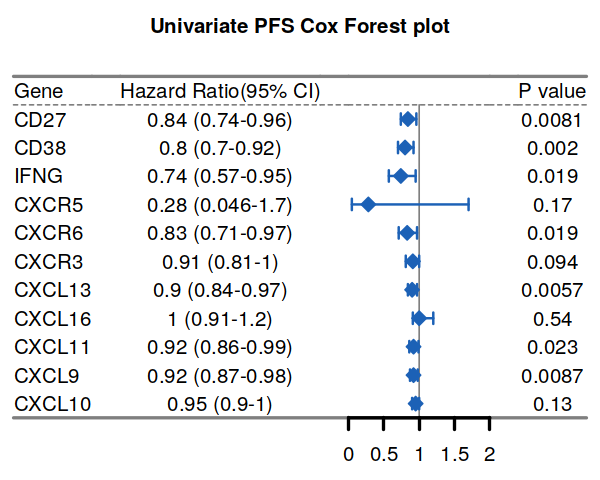

In [22]:
univ_formulas <- sapply(c('CD27','CD38','IFNG','CXCR5','CXCR6','CXCR3','CXCL13','CXCL16','CXCL11','CXCL9','CXCL10'),
                        function(x) as.formula(paste('Surv(FFI.time, FFI.event)~', x)))
univ_models <- lapply( univ_formulas, function(x){coxph(x, data = tmp_data)})      
 univ_results <- lapply(univ_models,
                       function(x){ 
                         x <- summary(x)
                         #获取p值
                         p.value<-signif(x$wald["pvalue"], digits=2)
                         #获取HR
                         HR <-signif(x$coef[2], digits=2);
                         #获取95%置信区间
                         HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                         HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                         HR <- paste0(HR, " (", 
                                      HR.confint.lower, "-", HR.confint.upper, ")")
                         res<-c(p.value,HR,signif(x$coef[2], digits=2),HR.confint.lower,HR.confint.upper)
                         names(res)<-c("p.value","HR (95% CI for HR)",'HR','lower','upper')
                         return(res)
                       }) 
univ_results <- t(as.data.frame(univ_results, check.names = FALSE))
univ_results <-as.data.frame(univ_results,stringsAsFactors=F) 
univ_results$HR <- as.numeric(univ_results$HR)
univ_results$lower <- as.numeric(univ_results$lower)
univ_results$upper <- as.numeric(univ_results$upper)
tabletext<-cbind(c(NA,"Gene",rownames(univ_results)),
                 c(NA,"Hazard Ratio(95% CI)",univ_results$`HR (95% CI for HR)`),
                 c(NA,"P value",ifelse(univ_results$p.value<0.001,"P < 0.001",univ_results$p.value))
                 )
fp2 <- forestplot(labeltext=tabletext, graph.pos=3,
          mean=c(NA,NA,univ_results$HR),
          lower=c(NA,NA,univ_results$lower), upper=c(NA,NA,univ_results$upper),
          ci.vertices.height = 0.2,ci.vertices=TRUE,
           boxsize=0.5,
           lwd.ci=1.5,
           zero=1,
           lwd.zero=1,
           colgap=unit(6,"mm"),
           xticks = c(0,0.5,1,1.5,2),
           lwd.xaxis=2,
           lineheight = unit(0.8,"cm"),
           graphwidth = unit(.25,"npc"), 
           hrzl_lines=list("2" = gpar(lty=1,lwd=2, col="gray50"),
                           "3" = gpar(lty=2, col="gray50"),
                           "14" = gpar(lwd=2, col="gray50",lty=1,columns=c(1:4))),
           txt_gp=fpTxtGp(
             label=gpar(cex=1),
             ticks=gpar(cex=1), 
             xlab=gpar(cex=1.5), 
             title=gpar(cex=1)),
           lty.ci=1.5,
           clip=c(0.1,9),
           ineheight=unit(9, 'mm'), 
           line.margin=unit(9, 'mm'),
           fn.ci_norm="fpDrawDiamondCI", 
           title="Univariate PFS Cox Forest plot",
           col=fpColors(box="#1c61b6", lines="#1c61b6", zero = "gray50"))
options(repr.plot.height = 4, repr.plot.width = 5)
fp2

In [22]:
library(gridExtra)

In [23]:
pdf(file = './output/bulk/section_4/2.selectGeneUnivariateCoxForestplot_OS.pdf',width = 4.5,height = 4)
print(fp1)
dev.off()
pdf(file = './output/bulk/section_4/2.selectGeneUnivariateCoxForestplot_PFS.pdf',width = 4.5,height = 4)
print(fp2)
dev.off()

png 
  2

png 
  2

.y.     group1    group2    p          p.adj  p.format p.signif method  
1 geneExp unknow    Sensitive 0.04071266 0.0810 0.0407   *        Wilcoxon
2 geneExp unknow    Resistant 0.87327806 0.8700 0.8733   ns       Wilcoxon
3 geneExp Sensitive Resistant 0.00114216 0.0034 0.0011   **       Wilcoxon

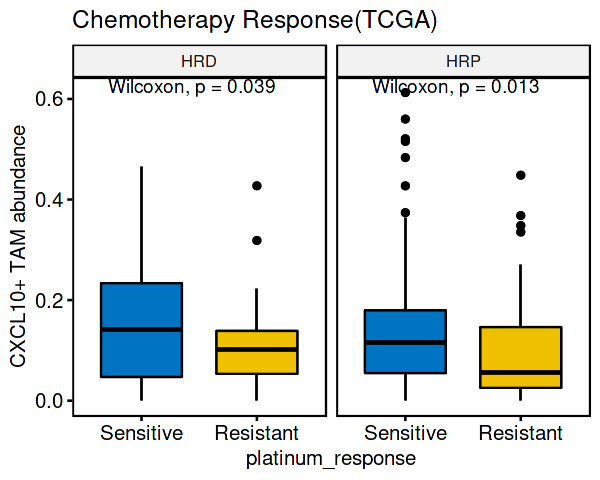

In [48]:
library(ggpubr)
tmp_data$geneExp <- CIBERSORTx_immuneCell[,'Macro_CXCL10']
compare_means(geneExp ~ platinum_response, data = tmp_data)
p2 <- ggboxplot(data = subset(tmp_data,platinum_response %in% c('Sensitive','Resistant') & HRD_status %in% c('HRD','HRP') ),x = 'platinum_response',y = 'geneExp',facet.by = "HRD_status",title = 'Chemotherapy Response(TCGA)',legend=NULL,fill ='platinum_response',ylab='CXCL10+ TAM abundance',add = 'boxplot',palette = "jco")+
stat_compare_means()+theme(legend.position="none")
options(repr.plot.height = 4, repr.plot.width = 5)
p2

In [44]:
pdf(file = './output/bulk/section_3/1.cibersort_CXCL10TAM_HRD_platinum_response.pdf',width = 5,height =4)
print(p2)
dev.off()

png 
  2

In [269]:
head(CIBERSORTx_immuneCell)

B.cell      CAF1       CAF2       CAF3         CAF4       
TCGA-23-1120-01 0.016018656 0.08196585 0.15443041 0.0000000000 0.026216432
TCGA-61-2003-01 0.000000000 0.52167182 0.03186063 0.0000000000 0.125553592
TCGA-13-1404-01 0.039672250 0.25104132 0.12369059 0.0372685402 0.000000000
TCGA-23-1027-01 0.011086760 0.30488336 0.14419757 0.0004712983 0.000000000
TCGA-23-1022-01 0.001259467 0.00000000 0.28058152 0.0000000000 0.006995720
TCGA-61-2088-01 0.014053803 0.05609129 0.23071398 0.0000000000 0.001326368
                CAF5         CD38.NK     CD8.Te     CD8.Tem     CD8.Tex ⋯
TCGA-23-1120-01 0.0000000000 0.026965240 0.06287633 0.000000000 0       ⋯
TCGA-61-2003-01 0.0000000000 0.000000000 0.20801299 0.000000000 0       ⋯
TCGA-13-1404-01 0.0000000000 0.022156710 0.10596354 0.001093635 0       ⋯
TCGA-23-1027-01 0.0001075459 0.001361755 0.08530078 0.013454454 0       ⋯
TCGA-23-1022-01 0.0000000000 0.000000000 0.05572791 0.008531318 0       ⋯
TCGA-61-2088-01 0.0000000000 0.000000000 0.04032919 0.010571386 0       ⋯
                pDC         Plasma.cell Tfh         Th17 Tn         Treg       
TCGA-23-1120-01 0.035089009 0.00000000  0.009362166 0    0.07770413 0.000000000
TCGA-61-2003-01 0.008378977 0.00000000  0.000000000 0    0.09584818 0.019077341
TCGA-13-1404-01 0.027181085 0.05232419  0.006046231 0    0.09397477 0.014542763
TCGA-23-1027-01 0.012112269 0.00000000  0.010433680 0    0.08204756 0.008685669
TCGA-23-1022-01 0.032643722 0.00000000  0.006834421 0    0.18028401 0.006606814
TCGA-61-2088-01 0.038190720 0.00000000  0.020943982 0    0.22216882 0.000000000
                P.value Correlation RMSE      Absolute.score..sig.score.
TCGA-23-1120-01 0       0.8932971   0.6815058 1.628248                  
TCGA-61-2003-01 0       0.9013518   0.6966336 2.273973                  
TCGA-13-1404-01 0       0.9324921   0.6314504 1.520620                  
TCGA-23-1027-01 0       0.8799905   0.6926681 1.687860                  
TCGA-23-1022-01 0       0.5484582   0.8912611 1.011039                  
TCGA-61-2088-01 0       0.6280813   0.8515735 1.284703

In [270]:
head(tmp_data)

aliquot_barcode patient_id   OS.event age anatomic_organ_subdivision
204 TCGA-23-1120-01 TCGA-23-1120 0        60  Right                     
472 TCGA-61-2003-01 TCGA-61-2003 0        53  Bilateral                 
133 TCGA-13-1404-01 TCGA-13-1404 0        48  Bilateral                 
191 TCGA-23-1027-01 TCGA-23-1027 1        48  Right                     
187 TCGA-23-1022-01 TCGA-23-1022 1        67  Left                      
479 TCGA-61-2088-01 TCGA-61-2088 0        51  Bilateral                 
    histological_type         person_neoplasm_cancer_status
204 Serous Cystadenocarcinoma null                         
472 Serous Cystadenocarcinoma WITH TUMOR                   
133 Serous Cystadenocarcinoma TUMOR FREE                   
191 Serous Cystadenocarcinoma null                         
187 Serous Cystadenocarcinoma WITH TUMOR                   
479 Serous Cystadenocarcinoma TUMOR FREE                   
    primary_therapy_outcome race  site_of_tumor_first_recurrence ⋯ COSMIC_29   
204 null                    WHITE null                           ⋯           NA
472 PROGRESSIVE DISEASE     WHITE null                           ⋯ 8.910357e-01
133 COMPLETE RESPONSE       WHITE null                           ⋯ 6.802505e+00
191 PROGRESSIVE DISEASE     WHITE null                           ⋯ 5.913000e-15
187 COMPLETE RESPONSE       WHITE METASTASIS                     ⋯ 0.000000e+00
479 null                    WHITE null                           ⋯ 0.000000e+00
    COSMIC_30 HRD_status2    Subtype_mRNA   Stromal_score Immune_score
204        NA NA             Immunoreactive  -430.28        453.34    
472 0.0000000 HR_deficiency  Mesenchymal          NA            NA    
133 0.0000000 HR_deficiency  Proliferative        NA            NA    
191 0.0000000 HR_proficiency Differentiated  -160.52        243.07    
187 0.0000000 HR_deficiency  Proliferative        NA            NA    
479 0.1936976 HR_proficiency Proliferative  -1477.91      -1490.94    
    ESTIMATE_score class TMB       mergeClass              
204    23.06       01           NA NA_unknow               
472       NA       NA    2.8942175 HR_deficiency_unknow    
133       NA       NA    1.6247095 HR_deficiency_Sensitive 
191    82.54       01    1.6390732 HR_proficiency_Sensitive
187       NA       NA    5.5985679 HR_deficiency_Sensitive 
479 -2968.85       01    0.5050415 HR_proficiency_unknow

In [49]:
tmp_data$`CD8+ Tex` <- CIBERSORTx_immuneCell[,'CD8.Tex']
tmp_data$`Plasma cell` <- CIBERSORTx_immuneCell[,'Plasma.cell']
tmp_data$`Tfh` <- CIBERSORTx_immuneCell[,'Tfh']
tmp_data$`Treg` <- CIBERSORTx_immuneCell[,'Treg']
tmp_data$`CXCL10+ Macro` <- CIBERSORTx_immuneCell[,'Macro_CXCL10']


In [50]:
tmp_data$gene1 <- CIBERSORTx_immuneCell[,'CD8.Tex']
tmp_data$gene2 <- CIBERSORTx_immuneCell[,'Plasma.cell']

In [51]:
tmp_data <- cbind(tmp_data,CIBERSORTx_immuneCell)

In [52]:
colnames(CIBERSORTx_immuneCell)

[1] "B.cell"                     "CAF1"                      
 [3] "CAF2"                       "CAF3"                      
 [5] "CAF4"                       "CAF5"                      
 [7] "CD38.NK"                    "CD8.Te"                    
 [9] "CD8.Tem"                    "CD8.Tex"                   
[11] "CD8.Tn"                     "CD8.TpreEx"                
[13] "cDC1"                       "cDC2"                      
[15] "Endo"                       "ISG.CD8T"                  
[17] "Macro_C1QB"                 "Macro_CCL3L3"              
[19] "Macro_CXCL10"               "Macro_MARCO"               
[21] "Macro_MT1H"                 "Macro_SPP1"                
[23] "mast_cell"                  "Mature.NK"                 
[25] "Mono_FCN1"                  "myCAF"                     
[27] "NK"                         "pDC"                       
[29] "Plasma.cell"                "Tfh"                       
[31] "Th17"                       "Tn"                        
[33] "Treg"                       "P.value"                   
[35] "Correlation"                "RMSE"                      
[37] "Absolute.score..sig.score."

In [275]:
?cor

In [160]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [60]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




In [170]:
p1 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'Plasma.cell',y = 'CD8.Tex',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p2 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'Plasma.cell',y = 'CD8.Te',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p3 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'Plasma.cell',y = 'Macro_CXCL10',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p4 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'Macro_CXCL10',y = 'CD8.Tex',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p5 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'CD8.Tex',y = 'CD8.Te',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p6 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'Macro_CXCL10',y = 'CD8.Te',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p7 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'Macro_CXCL10',y = 'Tfh',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p8 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'Plasma.cell',y = 'Tfh',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))
p9 <- ggscatter(data =CIBERSORTx_immuneCell,x = 'CD8.Te',y = 'Tfh',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='blue'))


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



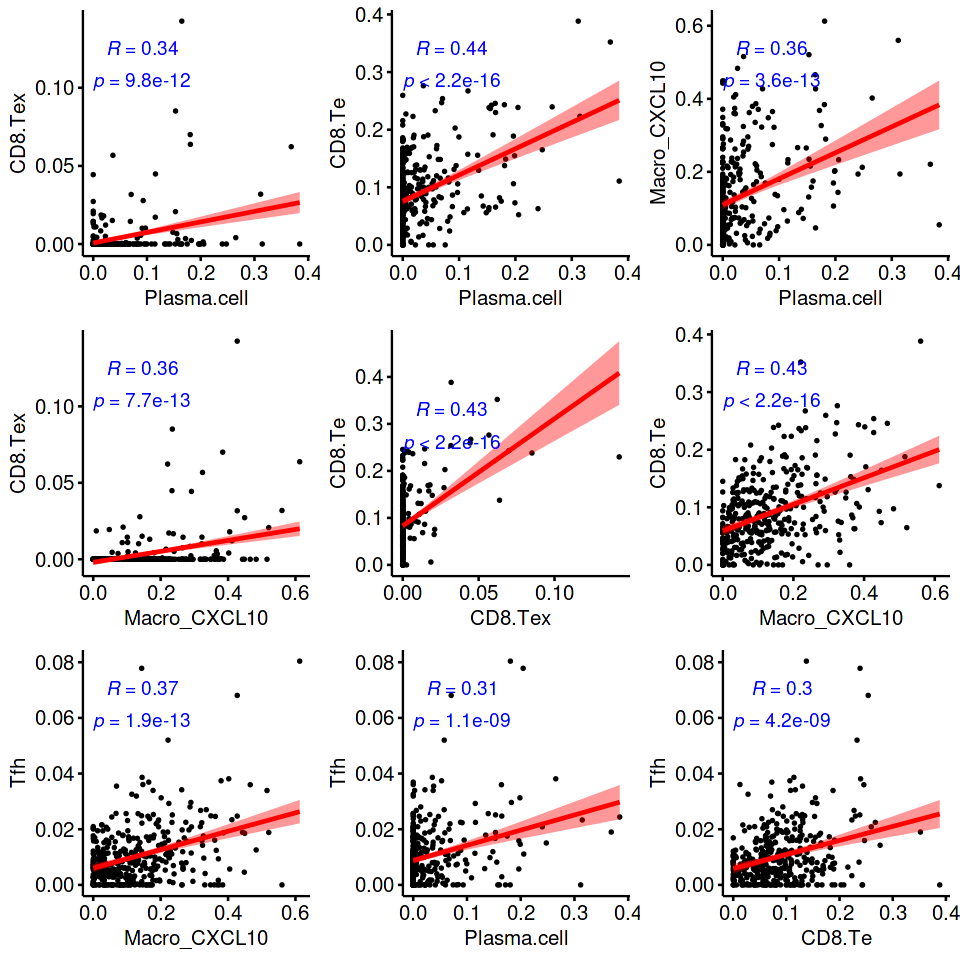

In [171]:
options(repr.plot.height = 8, repr.plot.width = 8)
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,ncol=3)

In [165]:
?pdf

In [173]:
pdf(file = './output/bulk/section_3/1.cibersort_scLM27_ggscatter.pdf',width = 6,height =6,pointsize = 3)
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,ncol=3)
dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

In [37]:
library(forestplot)

Loading required package: grid

Loading required package: magrittr

Loading required package: checkmate


Attaching package: ‘checkmate’


The following object is masked from ‘package:Biobase’:

    anyMissing


The following object is masked from ‘package:matrixStats’:

    anyMissing




In [281]:
univ_formulas <- sapply(colnames(CIBERSORTx_immuneCell)[1:33],
                        function(x) as.formula(paste('Surv(FFI.time, FFI.event)~', x)))
univ_models <- lapply( univ_formulas, function(x){coxph(x, data = tmp_data)})      
 univ_results <- lapply(univ_models,
                       function(x){ 
                         x <- summary(x)
                         #获取p值
                         p.value<-signif(x$wald["pvalue"], digits=2)
                         #获取HR
                         HR <-signif(x$coef[2], digits=2);
                         #获取95%置信区间
                         HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2)
                         HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                         HR <- paste0(HR, " (", 
                                      HR.confint.lower, "-", HR.confint.upper, ")")
                         res<-c(p.value,HR,signif(x$coef[2], digits=2),HR.confint.lower,HR.confint.upper)
                         names(res)<-c("p.value","HR (95% CI for HR)",'HR','lower','upper')
                         return(res)
                       }) 
univ_results <- t(as.data.frame(univ_results, check.names = FALSE))
univ_results <-as.data.frame(univ_results,stringsAsFactors=F) 
univ_results$HR <- as.numeric(univ_results$HR)
univ_results$lower <- as.numeric(univ_results$lower)
univ_results$upper <- as.numeric(univ_results$upper)
tabletext<-cbind(c(NA,"module",rownames(univ_results)),
                 c(NA,"Hazard Ratio(95% CI)",univ_results$`HR (95% CI for HR)`),
                 c(NA,"pValue",ifelse(univ_results$p.value<0.001,"P < 0.001",univ_results$p.value))
                 )
tabletext

[,1]         [,2]                     [,3]  
 [1,] NA           NA                       NA    
 [2,] module       Hazard Ratio(95% CI)     pValue
 [3,] B.cell       0.078 (7.7e-05-79)       0.47  
 [4,] CAF1         1.5 (0.88-2.5)           0.14  
 [5,] CAF2         2.6 (0.43-16)            0.3   
 [6,] CAF3         430 (7.2-26000)          0.0037
 [7,] CAF4         0.57 (0.003-110)         0.83  
 [8,] CAF5         5.3e-08 (3.2e-17-86)     0.12  
 [9,] CD38.NK      1.3 (0.0018-950)         0.93  
[10,] CD8.Te       0.093 (0.012-0.72)       0.023 
[11,] CD8.Tem      330 (3.8e-05-2.8e+09)    0.48  
[12,] CD8.Tex      9.4e-08 (4e-15-2.2)      0.062 
[13,] CD8.Tn       1.4 (0.0021-880)         0.93  
[14,] CD8.TpreEx   0.62 (4.6e-06-84000)     0.94  
[15,] cDC1         5.6 (0.065-480)          0.45  
[16,] cDC2         0.73 (0.27-2)            0.54  
[17,] Endo         0.43 (0.01-18)           0.66  
[18,] ISG.CD8T     2.6 (0.29-24)            0.39  
[19,] Macro_C1QB   2.7 (1-7.3)              0.051 
[20,] Macro_CCL3L3 3.7e+07 (0.0046-2.9e+17) 0.13  
[21,] Macro_CXCL10 0.25 (0.083-0.77)        0.015 
[22,] Macro_MARCO  0.11 (0.0094-1.4)        0.087 
[23,] Macro_MT1H   0.83 (7.8e-06-88000)     0.98  
[24,] Macro_SPP1   1.2 (0.35-4.1)           0.77  
[25,] mast_cell    2400000 (0.041-1.4e+14)  0.11  
[26,] Mature.NK    7e+09 (0.14-3.4e+20)     0.071 
[27,] Mono_FCN1    0.014 (5.8e-06-32)       0.28  
[28,] myCAF        0.14 (0.00054-35)        0.48  
[29,] NK           1.2 (0.0011-1400)        0.95  
[30,] pDC          0.22 (1.3e-05-3900)      0.76  
[31,] Plasma.cell  0.052 (0.0048-0.57)      0.016 
[32,] Tfh          0.0073 (3e-08-1800)      0.44  
[33,] Th17         0.37 (1.6e-05-8600)      0.85  
[34,] Tn           0.27 (0.025-2.9)         0.28  
[35,] Treg         0.0046 (4e-08-530)       0.37

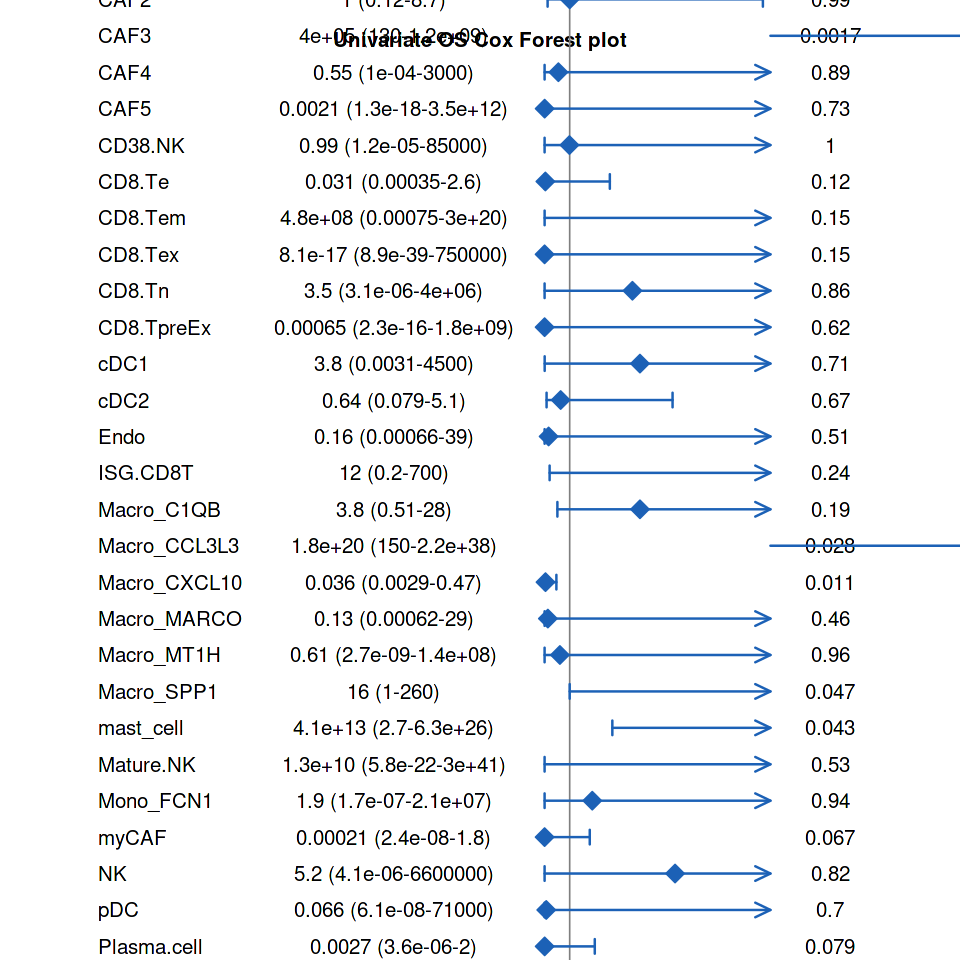

In [205]:
fp <- forestplot(labeltext=tabletext, graph.pos=3,
          mean=c(NA,NA,univ_results$HR),
          lower=c(NA,NA,univ_results$lower), upper=c(NA,NA,univ_results$upper),
          ci.vertices.height = 0.2,ci.vertices=TRUE,
           boxsize=0.5,
           lwd.ci=1.5,
           zero=1,
           lwd.zero=1,
           colgap=unit(6,"mm"),
           xticks = c(0,0.5,1,1.5,2),
           lwd.xaxis=2,
           lineheight = unit(0.8,"cm"),
           graphwidth = unit(.25,"npc"), 
           hrzl_lines=list("2" = gpar(lty=1,lwd=2, col="gray50"),
                           "3" = gpar(lty=2, col="gray50"),
                           "35" = gpar(lwd=2, col="gray50",lty=1,columns=c(1:4))),
           txt_gp=fpTxtGp(
             label=gpar(cex=1),
             ticks=gpar(cex=1), 
             xlab=gpar(cex=1.5), 
             title=gpar(cex=1)),
           lty.ci=1.5,
           clip=c(0.1,9),
           ineheight=unit(9, 'mm'), 
           line.margin=unit(9, 'mm'),
           fn.ci_norm="fpDrawDiamondCI", 
           title="Univariate OS Cox Forest plot",
           col=fpColors(box="#1c61b6", lines="#1c61b6", zero = "gray50"))
fp

In [91]:
library(ggpubr)

`geom_smooth()` using formula 'y ~ x'



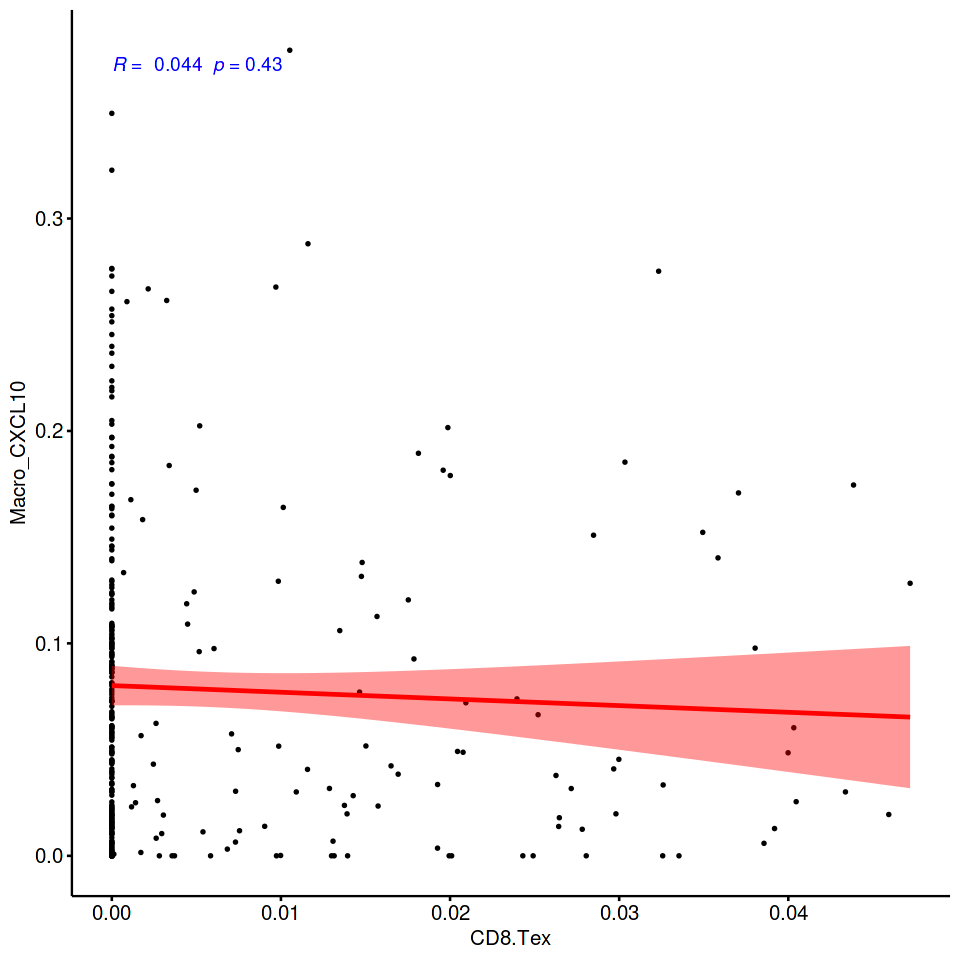

In [125]:
ggscatter(data =CIBERSORTx_immuneCell,x = 'CD8.Tex',y = 'Macro_CXCL10',size = 0.5,add = "reg.line",conf.int = TRUE,cor.coef = T,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\\n",color='blue'))


In [43]:
library(survminer)
require("survival")

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma




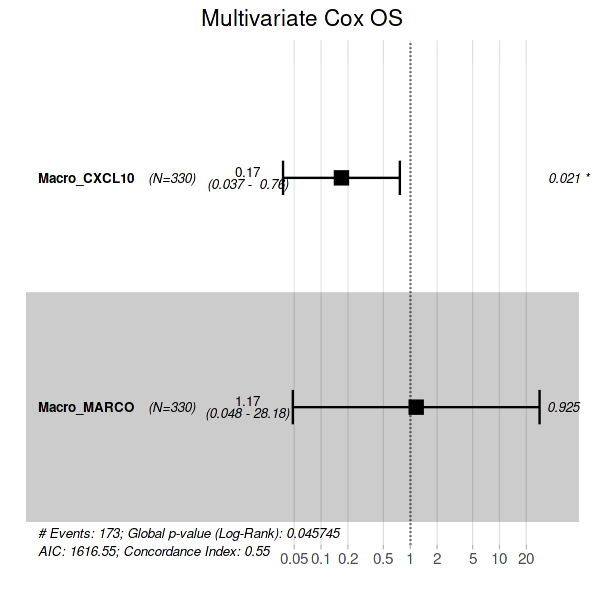

In [55]:
res.cox_OS <- coxph(Surv(OS.time,OS.event) ~ Macro_CXCL10+Macro_MARCO, data = tmp_data)
res <- summary(res.cox_OS)
cox_OS <- ggforest(res.cox_OS,data = tmp_data,noDigits = 2,main = 'Multivariate Cox OS')
options(repr.plot.height = 5, repr.plot.width = 5)
cox_OS

In [3]:
?surv_cutpoint

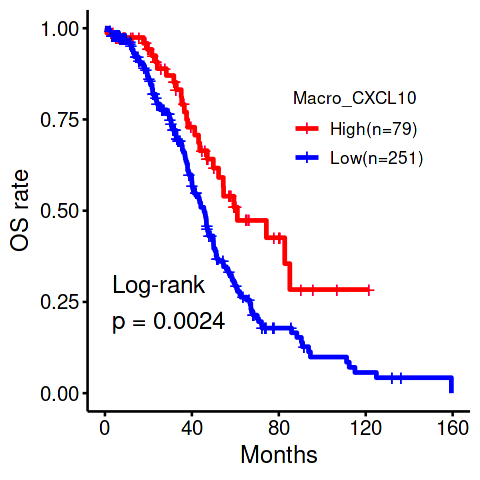

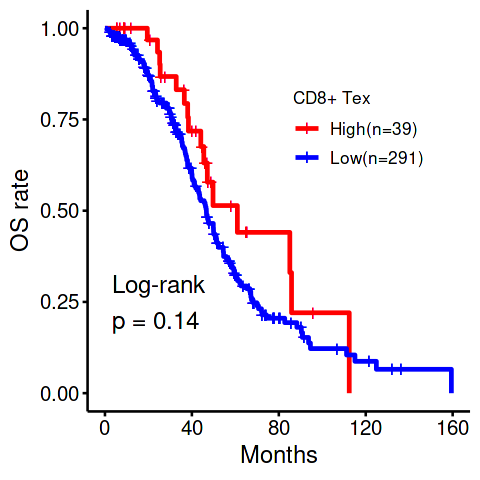

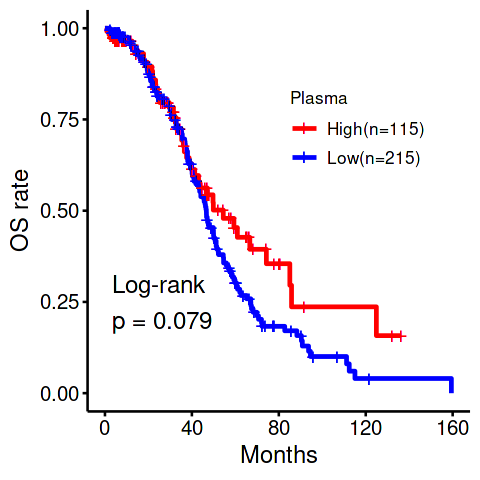

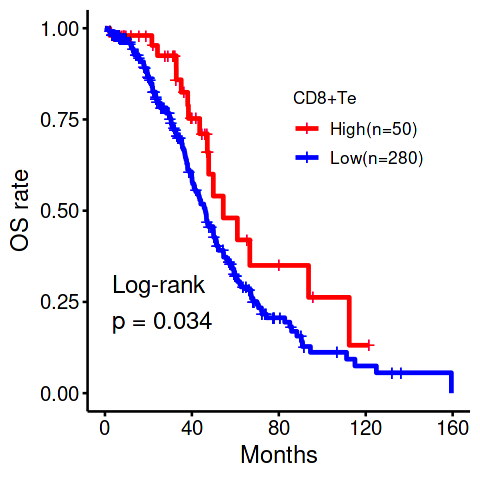

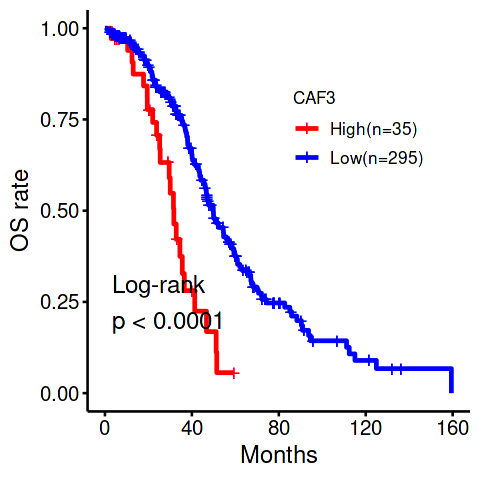

In [56]:
res.cut <- surv_cutpoint(tmp_data, time = "OS.time", event = "OS.event",
   variables = c("Macro_CXCL10", "CD8.Tex", "Plasma.cell",'CD8.Te','CAF3'))
tmp_data$Macro_CXCL10Class <- ifelse(tmp_data$Macro_CXCL10>summary(res.cut)['Macro_CXCL10','cutpoint'],'High','Low')
tmp_data$CD8.TexClass <- ifelse(tmp_data$CD8.Tex>summary(res.cut)['CD8.Tex','cutpoint'],'High','Low')
tmp_data$Plasma.cellClass <- ifelse(tmp_data$Plasma.cell>summary(res.cut)['Plasma.cell','cutpoint'],'High','Low')
tmp_data$CD8.TeClass <- ifelse(tmp_data$CD8.Te>summary(res.cut)['CD8.Te','cutpoint'],'High','Low')
tmp_data$CAF3Class <- ifelse(tmp_data$CAF3>summary(res.cut)['CAF3','cutpoint'],'High','Low')

fit <- survfit(Surv(OS.time, OS.event) ~ Macro_CXCL10Class, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$Macro_CXCL10Class)['High'],')'),paste0('Low(n=',table(tmp_data$Macro_CXCL10Class)['Low'],')'))
OS_Macro_CXCL10 <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Months',
    ylab='OS rate',
  legend=c(0.7,0.7),
  legend.title='Macro_CXCL10',
  legend.labs = labs
)

fit <- survfit(Surv(OS.time, OS.event) ~ CD8.TexClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CD8.TexClass)['High'],')'),paste0('Low(n=',table(tmp_data$CD8.TexClass)['Low'],')'))
OS_CD8.Tex <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Months',
    ylab='OS rate',
  legend=c(0.7,0.7),
  legend.title='CD8+ Tex',
  legend.labs = labs
)

fit <- survfit(Surv(OS.time, OS.event) ~ Plasma.cellClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$Plasma.cellClass)['High'],')'),paste0('Low(n=',table(tmp_data$Plasma.cellClass)['Low'],')'))
OS_Plasma <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Months',
    ylab='OS rate',
  legend=c(0.7,0.7),
  legend.title='Plasma',
  legend.labs = labs
)
fit <- survfit(Surv(OS.time, OS.event) ~ CD8.TeClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CD8.TeClass)['High'],')'),paste0('Low(n=',table(tmp_data$CD8.TeClass)['Low'],')'))
OS_CD8.Te <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Months',
    ylab='OS rate',
  legend=c(0.7,0.7),
  legend.title='CD8+Te',
  legend.labs = labs
)
fit <- survfit(Surv(OS.time, OS.event) ~ CAF3Class, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CAF3Class)['High'],')'),paste0('Low(n=',table(tmp_data$CAF3Class)['Low'],')'))
OS_CAF3 <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Months',
 ylab='OS rate',
  legend=c(0.7,0.7),
  legend.title='CAF3',
  legend.labs = labs
)
options(repr.plot.height = 4, repr.plot.width = 4)
OS_Macro_CXCL10
OS_CD8.Tex
OS_Plasma
OS_CD8.Te
OS_CAF3

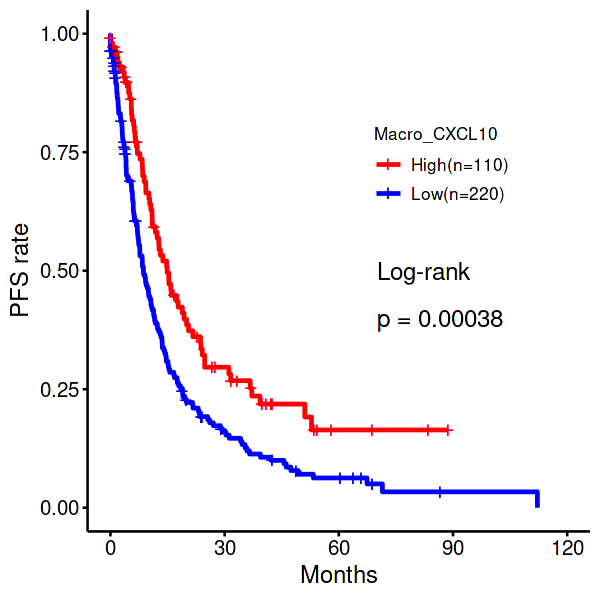

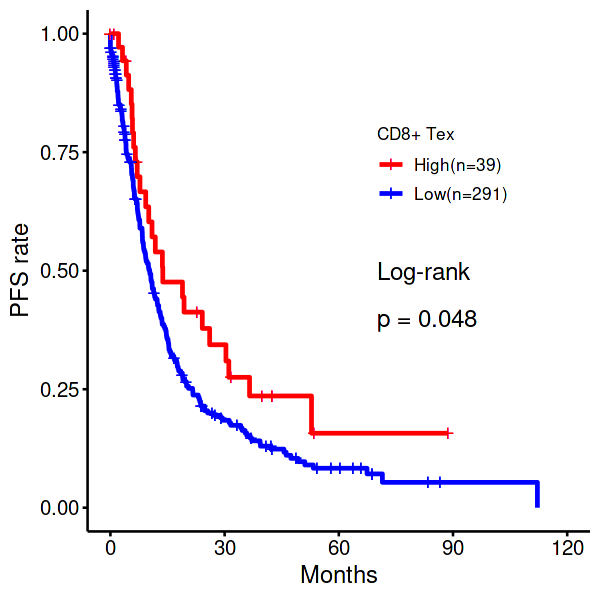

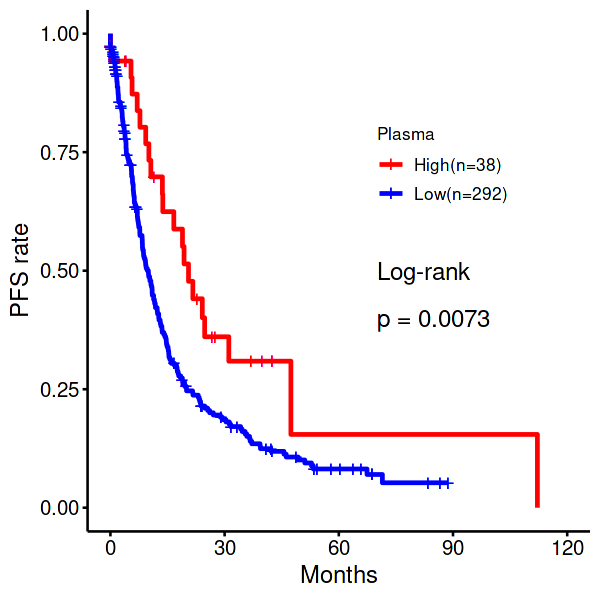

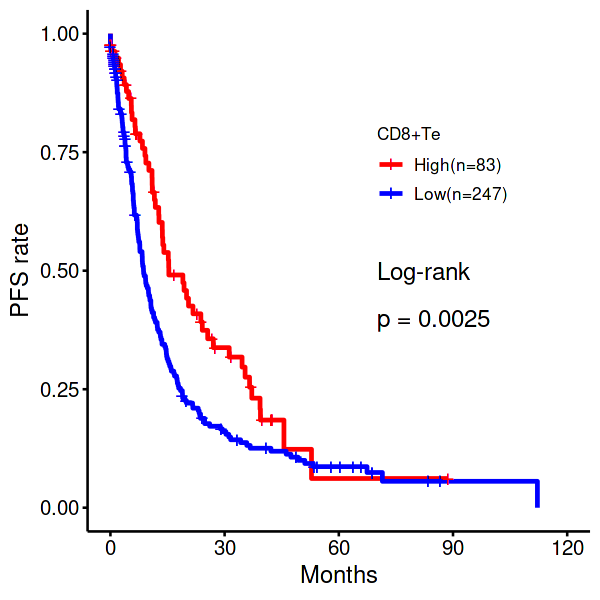

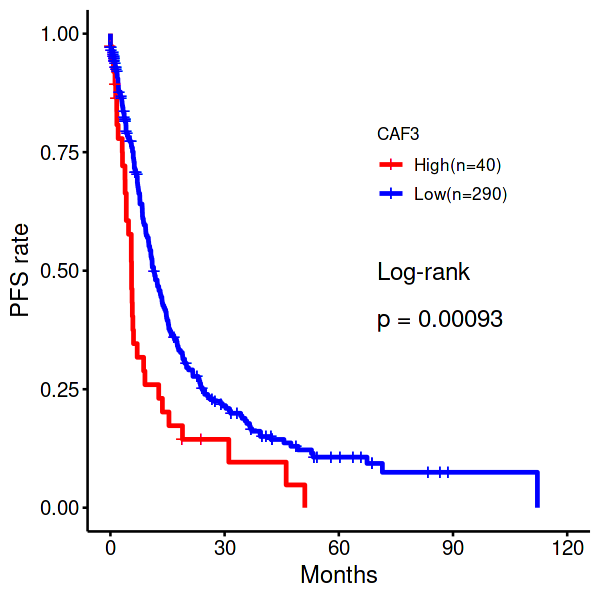

In [57]:
res.cut <- surv_cutpoint(tmp_data, time = "FFI.time", event = "FFI.event",
   variables = c("Macro_CXCL10", "CD8.Tex", "Plasma.cell",'CD8.Te','CAF3'))
tmp_data$Macro_CXCL10Class <- ifelse(tmp_data$Macro_CXCL10>summary(res.cut)['Macro_CXCL10','cutpoint'],'High','Low')
tmp_data$CD8.TexClass <- ifelse(tmp_data$CD8.Tex>summary(res.cut)['CD8.Tex','cutpoint'],'High','Low')
tmp_data$Plasma.cellClass <- ifelse(tmp_data$Plasma.cell>summary(res.cut)['Plasma.cell','cutpoint'],'High','Low')
tmp_data$CD8.TeClass <- ifelse(tmp_data$CD8.Te>summary(res.cut)['CD8.Te','cutpoint'],'High','Low')
tmp_data$CAF3Class <- ifelse(tmp_data$CAF3>summary(res.cut)['CAF3','cutpoint'],'High','Low')

fit <- survfit(Surv(FFI.time, FFI.event) ~ Macro_CXCL10Class, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$Macro_CXCL10Class)['High'],')'),paste0('Low(n=',table(tmp_data$Macro_CXCL10Class)['Low'],')'))
PFS_Macro_CXCL10 <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='PFS rate',
  legend=c(0.7,0.7),
  legend.title='Macro_CXCL10',
  legend.labs = labs
)

fit <- survfit(Surv(FFI.time, FFI.event) ~ CD8.TexClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CD8.TexClass)['High'],')'),paste0('Low(n=',table(tmp_data$CD8.TexClass)['Low'],')'))
PFS_CD8.Tex <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
 pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='PFS rate',
  legend=c(0.7,0.7),
  legend.title='CD8+ Tex',
  legend.labs = labs
)

fit <- survfit(Surv(FFI.time, FFI.event) ~ Plasma.cellClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$Plasma.cellClass)['High'],')'),paste0('Low(n=',table(tmp_data$Plasma.cellClass)['Low'],')'))
PFS_Plasma <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
  pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='PFS rate',
  legend=c(0.7,0.7),
  legend.title='Plasma',
  legend.labs = labs
)
fit <- survfit(Surv(FFI.time, FFI.event) ~ CD8.TeClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CD8.TeClass)['High'],')'),paste0('Low(n=',table(tmp_data$CD8.TeClass)['Low'],')'))
PFS_CD8.Te <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
    pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='PFS rate',
  legend=c(0.7,0.7),
  legend.title='CD8+Te',
  legend.labs = labs
)
fit <- survfit(Surv(FFI.time, FFI.event) ~ CAF3Class, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CAF3Class)['High'],')'),paste0('Low(n=',table(tmp_data$CAF3Class)['Low'],')'))
PFS_CAF3 <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
    pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='PFS rate',
  legend=c(0.7,0.7),
  legend.title='CAF3',
  legend.labs = labs
)
options(repr.plot.height = 4, repr.plot.width = 4)
options(repr.plot.height = 5, repr.plot.width = 5)
PFS_Macro_CXCL10
PFS_CD8.Tex
PFS_Plasma
PFS_CD8.Te
PFS_CAF3

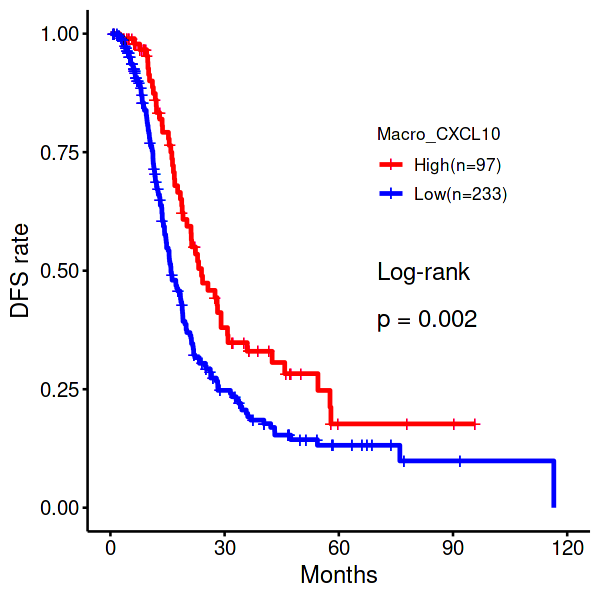

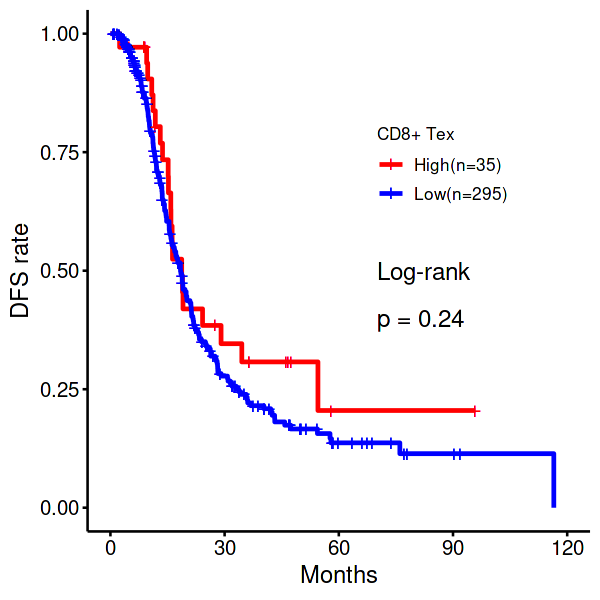

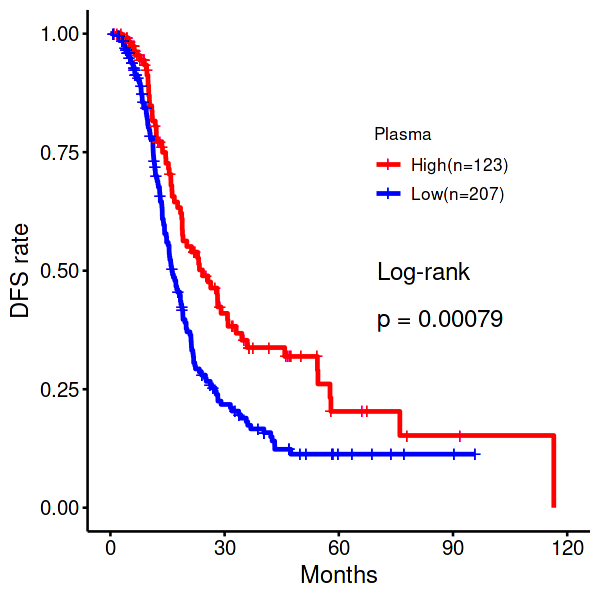

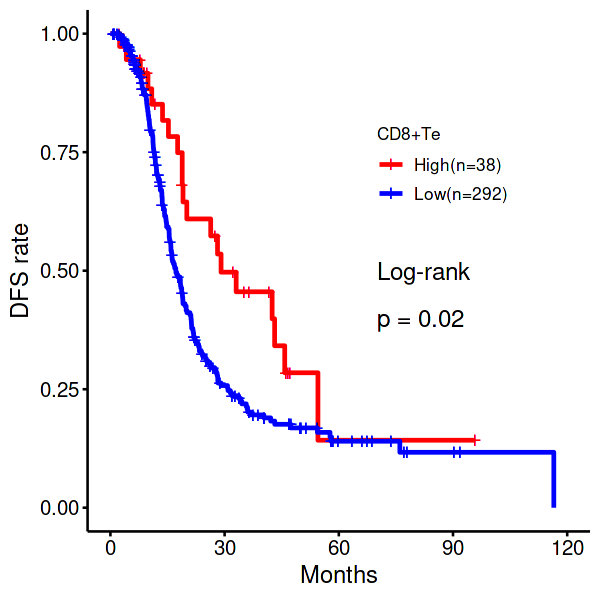

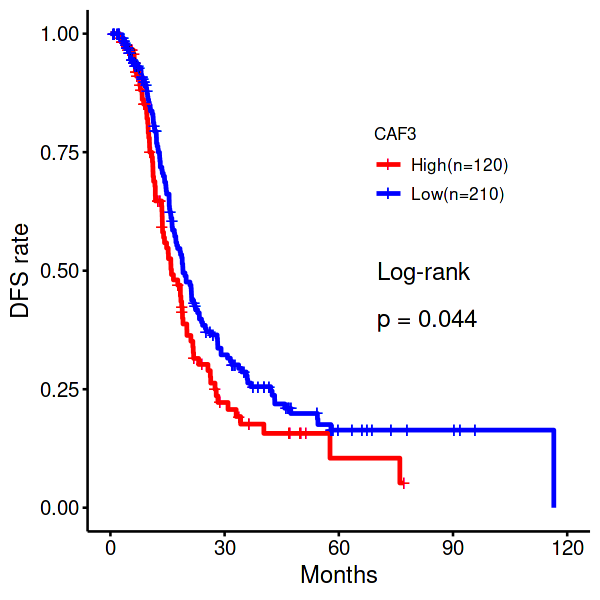

In [58]:
res.cut <- surv_cutpoint(tmp_data, time = "DFS.time", event = "DFS.event",
   variables = c("Macro_CXCL10", "CD8.Tex", "Plasma.cell","CD8.Te","CAF3"))
tmp_data$Macro_CXCL10Class <- ifelse(tmp_data$Macro_CXCL10>summary(res.cut)['Macro_CXCL10','cutpoint'],'High','Low')
tmp_data$CD8.TexClass <- ifelse(tmp_data$CD8.Tex>summary(res.cut)['CD8.Tex','cutpoint'],'High','Low')
tmp_data$Plasma.cellClass <- ifelse(tmp_data$Plasma.cell>summary(res.cut)['Plasma.cell','cutpoint'],'High','Low')
tmp_data$CD8.TeClass <- ifelse(tmp_data$CD8.Te>summary(res.cut)['CD8.Te','cutpoint'],'High','Low')
tmp_data$CAF3Class <- ifelse(tmp_data$CAF3>summary(res.cut)['CAF3','cutpoint'],'High','Low')


fit <- survfit(Surv(DFS.time, DFS.event) ~ Macro_CXCL10Class, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$Macro_CXCL10Class)['High'],')'),paste0('Low(n=',table(tmp_data$Macro_CXCL10Class)['Low'],')'))
DFS_Macro_CXCL10 <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='DFS rate',
  legend=c(0.7,0.7),
  legend.title='Macro_CXCL10',
  legend.labs = labs
)

fit <- survfit(Surv(DFS.time, DFS.event) ~ CD8.TexClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CD8.TexClass)['High'],')'),paste0('Low(n=',table(tmp_data$CD8.TexClass)['Low'],')'))
DFS_CD8.Tex <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
 pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='DFS rate',
  legend=c(0.7,0.7),
  legend.title='CD8+ Tex',
  legend.labs = labs
)

fit <- survfit(Surv(DFS.time, DFS.event) ~ Plasma.cellClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$Plasma.cellClass)['High'],')'),paste0('Low(n=',table(tmp_data$Plasma.cellClass)['Low'],')'))
DFS_Plasma <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
  pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='DFS rate',
  legend=c(0.7,0.7),
  legend.title='Plasma',
  legend.labs = labs
)
fit <- survfit(Surv(DFS.time, DFS.event) ~ CD8.TeClass, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CD8.TeClass)['High'],')'),paste0('Low(n=',table(tmp_data$CD8.TeClass)['Low'],')'))
DFS_CD8.Te <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
    pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='DFS rate',
  legend=c(0.7,0.7),
  legend.title='CD8+Te',
  legend.labs = labs
)
fit <- survfit(Surv(DFS.time, DFS.event) ~ CAF3Class, data = tmp_data)
labs <- c(paste0('High(n=',table(tmp_data$CAF3Class)['High'],')'),paste0('Low(n=',table(tmp_data$CAF3Class)['Low'],')'))
DFS_CAF3 <- ggsurvplot(
  fit, 
  data = tmp_data,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
    pval.coord=c(70,0.4),
    pval.method.coord=c(70,0.5),
  xlab ='Months',
    ylab='DFS rate',
  legend=c(0.7,0.7),
  legend.title='CAF3',
  legend.labs = labs
)
options(repr.plot.height = 5, repr.plot.width = 5)
DFS_Macro_CXCL10
DFS_CD8.Tex
DFS_Plasma
DFS_CD8.Te
DFS_CAF3

In [47]:
class(OS_Plasma$plot)

[1] "gg"     "ggplot"

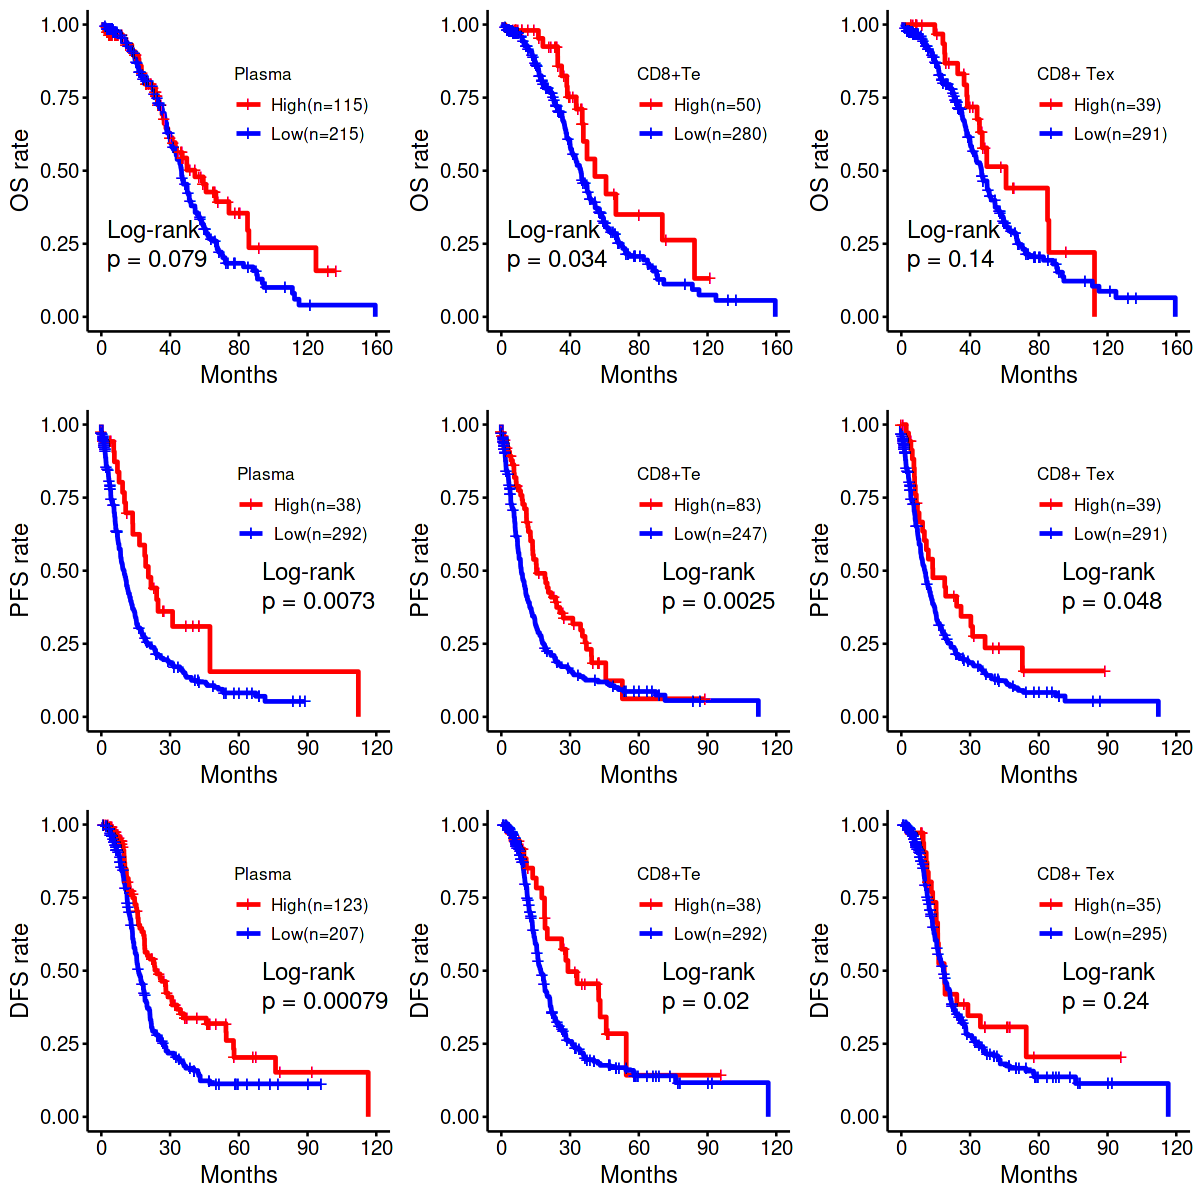

In [61]:
options(repr.plot.height = 10, repr.plot.width = 10)
grid.arrange(OS_Plasma$plot,OS_CD8.Te$plot,OS_CD8.Tex$plot,PFS_Plasma$plot,PFS_CD8.Te$plot,PFS_CD8.Tex$plot,DFS_Plasma$plot,DFS_CD8.Te$plot,DFS_CD8.Tex$plot,ncol=3)

In [67]:
pdf(file = './output/bulk/section_3/1.cibersort_3CellType_surv_plot_TCGA.pdf',width = 10,height = 10)
grid.arrange(OS_Plasma$plot,OS_CD8.Te$plot,OS_CD8.Tex$plot,PFS_Plasma$plot,PFS_CD8.Te$plot,PFS_CD8.Tex$plot,DFS_Plasma$plot,DFS_CD8.Te$plot,DFS_CD8.Tex$plot,ncol=3)
dev.off()

png 
  2

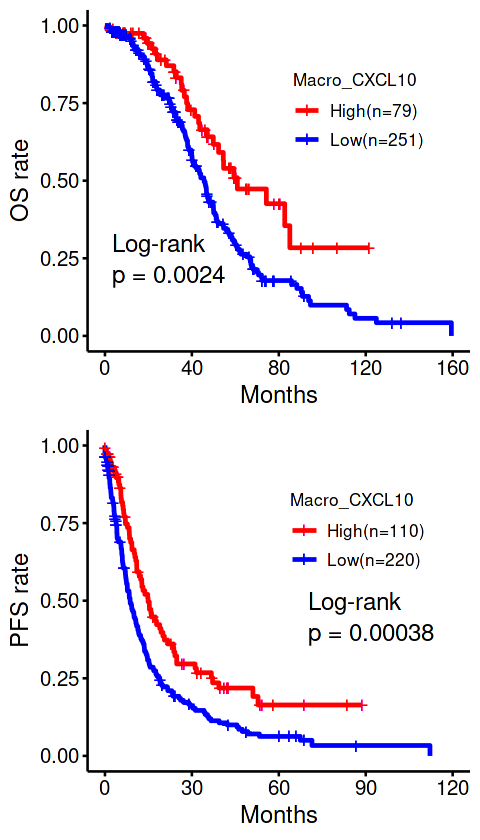

In [74]:
options(repr.plot.height = 7, repr.plot.width = 4)
grid.arrange(OS_Macro_CXCL10$plot,PFS_Macro_CXCL10$plot,ncol=1)

In [75]:
pdf(file = './output/bulk/section_3/1.cibersort_CXCL10TAM_surv_plot_TCGA.pdf',width = 4,height = 7)
grid.arrange(OS_Macro_CXCL10$plot,PFS_Macro_CXCL10$plot,ncol=1)
dev.off()

png 
  2

In [77]:
head(OV_TCGA_cibersortResult)

Mixture          B.cells.naive B.cells.memory Plasma.cells T.cells.CD8
1 TCGA.23.1120.01A 0.005799362   0.025353589    0.02255307   0.09168425 
2 TCGA.29.1695.01A 0.011185668   0.009855082    0.01154366   0.04192526 
3 TCGA.61.2003.01A 0.042523638   0.000000000    0.01168012   0.07771634 
4 TCGA.13.1404.01A 0.024309442   0.028617228    0.10612287   0.08263018 
5 TCGA.23.1027.01A 0.004273258   0.043732998    0.00000000   0.02223793 
6 TCGA.23.1022.01A 0.034572423   0.049849486    0.03853267   0.04239041 
  T.cells.CD4.naive T.cells.CD4.memory.resting T.cells.CD4.memory.activated
1 0                 0.1967998                  0.02559313                  
2 0                 0.1773264                  0.00000000                  
3 0                 0.2194158                  0.00000000                  
4 0                 0.1372219                  0.00000000                  
5 0                 0.1742126                  0.00000000                  
6 0                 0.1713421                  0.00000000                  
  T.cells.follicular.helper T.cells.regulatory..Tregs. ⋯ Macrophages.M2
1 0.03165946                0.035653325                ⋯ 0.1382442     
2 0.00000000                0.022758046                ⋯ 0.1601396     
3 0.00000000                0.008133813                ⋯ 0.1563652     
4 0.04713265                0.066492940                ⋯ 0.1893627     
5 0.02316115                0.014139876                ⋯ 0.1634740     
6 0.01832066                0.055134968                ⋯ 0.2160437     
  Dendritic.cells.resting Dendritic.cells.activated Mast.cells.resting
1 0.0006336813            0.000000000               0.02113723        
2 0.0000000000            0.000000000               0.00000000        
3 0.0667547213            0.000000000               0.01723346        
4 0.0134781459            0.006223509               0.02927667        
5 0.0017268490            0.002194608               0.00000000        
6 0.0000000000            0.000000000               0.01859786        
  Mast.cells.activated Eosinophils Neutrophils P.value Correlation RMSE     
1 0.000000000          0.000000000 0.003036120 0.000   0.7309353   0.7348512
2 0.040333856          0.000000000 0.003029567 0.000   0.8339974   0.6288671
3 0.000000000          0.000000000 0.000000000 0.000   0.7562196   0.7234278
4 0.000000000          0.001449564 0.004817282 0.000   0.4525771   0.8915709
5 0.042857730          0.003370263 0.002659765 0.000   0.7181469   0.7238952
6 0.004168403          0.000000000 0.000000000 0.001   0.3757010   0.9289543

In [81]:
colnames(tmp_data)

[1] "B.cells.naive"                "B.cells.memory"              
 [3] "Plasma.cells"                 "T.cells.CD8"                 
 [5] "T.cells.CD4.naive"            "T.cells.CD4.memory.resting"  
 [7] "T.cells.CD4.memory.activated" "T.cells.follicular.helper"   
 [9] "T.cells.regulatory..Tregs."   "T.cells.gamma.delta"         
[11] "NK.cells.resting"             "NK.cells.activated"          
[13] "Monocytes"                    "Macrophages.M0"              
[15] "Macrophages.M1"               "Macrophages.M2"              
[17] "Dendritic.cells.resting"      "Dendritic.cells.activated"   
[19] "Mast.cells.resting"           "Mast.cells.activated"        
[21] "Eosinophils"                  "Neutrophils"

In [35]:
load(file = "./output/MEGENA/summary.TCGA_MEGENA.output.RData")
all_signiff_modules_fisher <- readRDS(file = './output/MEGENA/all_signiff_modules_fisher.RDS')
modules_list <- summary.TCGA_MEGENA.output$modules[all_signiff_modules_fisher]

In [98]:
cor2M22_sub

module celltype                     cor          p           
M8.cor   M8     Naive B cell                  0.176226370 5.680262e-04
M8.cor1  M8     Memory B cell                -0.195642070 1.264508e-04
M8.cor2  M8     Plasma cell                   0.676783499 4.316466e-52
M8.cor3  M8     CD8+ T cell                   0.406026299 1.783151e-16
M8.cor4  M8     Naive T cell                           NA           NA
M8.cor5  M8     Resting memory CD4+ T cell   -0.210943330 3.477032e-05
M8.cor6  M8     Activated memory CD4+ T cell  0.351551756 1.820418e-12
M8.cor7  M8     Tfh                           0.138155550 7.067522e-03
M8.cor8  M8     Treg                          0.207206303 4.808395e-05
M8.cor9  M8     γδ T cell                     0.148261162 3.818166e-03
M8.cor10 M8     Resting NK                   -0.172445754 7.479756e-04
M8.cor11 M8     Activated NK                 -0.210342941 3.664352e-05
M8.cor12 M8     Monocytes                    -0.203426785 6.635167e-05
M8.cor13 M8     Macrophages-M0               -0.191635343 1.745484e-04
M8.cor14 M8     Macrophages-M1                0.287509485 1.201552e-08
M8.cor15 M8     Macrophages-M2               -0.326707872 7.074907e-11
M8.cor16 M8     Resting DC                    0.018794526 7.153249e-01
M8.cor17 M8     Activated DC                 -0.347930047 3.167988e-12
M8.cor18 M8     Resting mast cell            -0.145066110 4.657849e-03
M8.cor19 M8     Activated mast cell          -0.049222352 3.392385e-01
M8.cor20 M8     Eosinophils                  -0.199493356 9.219394e-05
M8.cor21 M8     Neutrophils                   0.086791924 9.155291e-02
M3.cor   M3     Naive B cell                 -0.052050722 3.121804e-01
M3.cor1  M3     Memory B cell                -0.253594825 5.654210e-07
M3.cor2  M3     Plasma cell                   0.320885584 1.592207e-10
M3.cor3  M3     CD8+ T cell                   0.558178210 2.002741e-32
M3.cor4  M3     Naive T cell                           NA           NA
M3.cor5  M3     Resting memory CD4+ T cell   -0.218192176 1.823607e-05
M3.cor6  M3     Activated memory CD4+ T cell  0.490744398 2.306680e-24
M3.cor7  M3     Tfh                           0.173381063 6.991085e-04
M3.cor8  M3     Treg                          0.380921889 1.556080e-14
M3.cor9  M3     γδ T cell                     0.164554290 1.304941e-03
M3.cor10 M3     Resting NK                   -0.201628782 7.717741e-05
M3.cor11 M3     Activated NK                  0.003389853 9.475565e-01
M3.cor12 M3     Monocytes                    -0.151095125 3.190735e-03
M3.cor13 M3     Macrophages-M0               -0.230393556 5.854541e-06
M3.cor14 M3     Macrophages-M1                0.409201894 9.856937e-17
M3.cor15 M3     Macrophages-M2               -0.230738942 5.664022e-06
M3.cor16 M3     Resting DC                    0.121272512 1.818406e-02
M3.cor17 M3     Activated DC                 -0.354121556 1.223389e-12
M3.cor18 M3     Resting mast cell            -0.125152947 1.476826e-02
M3.cor19 M3     Activated mast cell          -0.098674008 5.494399e-02
M3.cor20 M3     Eosinophils                  -0.262364468 2.196690e-07
M3.cor21 M3     Neutrophils                   0.062614013 2.239347e-01

Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y

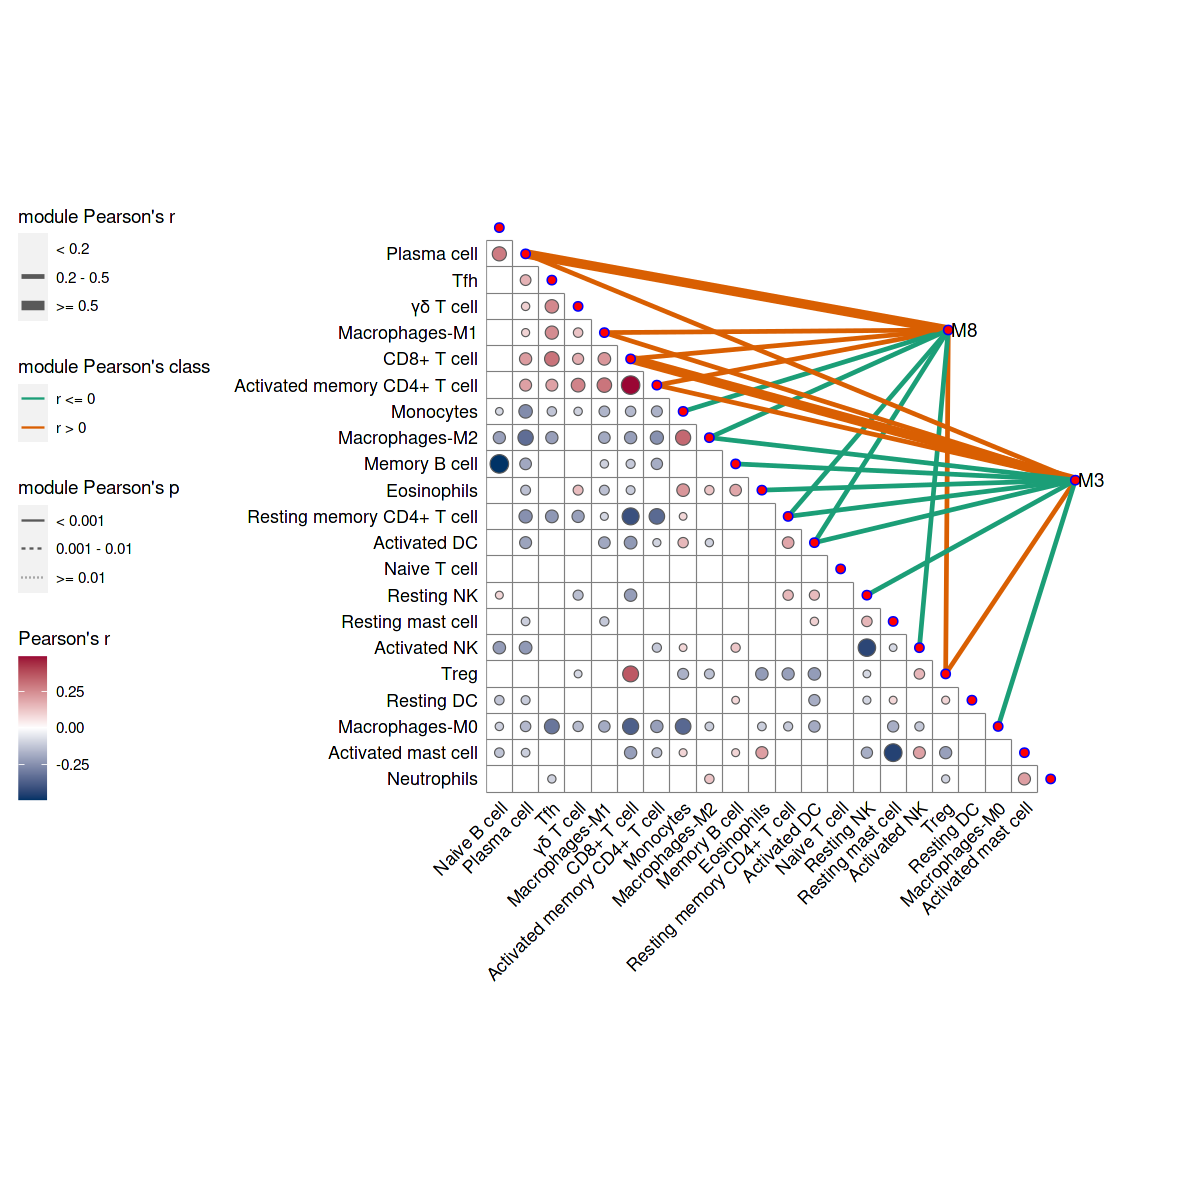

In [106]:
M8M3Cor2LM22

In [107]:
pdf(file = './output/bulk/section_3/1.cibersort_LM22_Heatmap.pdf',width =10,height = 10)
print(M8M3Cor2LM22)
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδ T cell' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBound

png 
  2

In [296]:
?ggscatter

In [84]:
colnames(tmp_data)

[1] "Naive B cell"                 "Memory B cell"               
 [3] "Plasma cell"                  "CD8+ T cell"                 
 [5] "Naive T cell"                 "Resting memory CD4+ T cell"  
 [7] "Activated memory CD4+ T cell" "Tfh"                         
 [9] "Treg"                         "γδ T cell"                   
[11] "Resting NK"                   "Activated NK"                
[13] "Monocytes"                    "Macrophages-M0"              
[15] "Macrophages-M1"               "Macrophages-M2"              
[17] "Resting DC"                   "Activated DC"                
[19] "Resting mast cell"            "Activated mast cell"         
[21] "Eosinophils"                  "Neutrophils"

## 3.2 Prognostic effect of immune cell infiltration(GSE140082)

In [37]:
GSE140082_CIBERSORTx <- read.table('./data/bulk/GEO/treatment/CIBERSORTx_GSE140082_results.txt',header = T,sep = '\t',row.names = 1)
head(GSE140082_CIBERSORTx)

B.cell     CAF1        CAF2      CAF3        CAF4       CAF5        
GSM4153778 0.00000000 0.000000000 0.2811346 0.003476417 0.02714884 0.0000000000
GSM4153779 0.00000000 0.000000000 0.2845943 0.015270415 0.07897662 0.0000000000
GSM4153780 0.00000000 0.024570900 0.5081112 0.000000000 0.01401757 0.0007826186
GSM4153781 0.02822706 0.110021498 0.3973811 0.022519773 0.10562735 0.0000000000
GSM4153782 0.00000000 0.027545897 0.4316852 0.060992719 0.04370396 0.0018278287
GSM4153783 0.00000000 0.000673274 0.2488619 0.000000000 0.09042736 0.0008401385
           CD38.NK    CD8.Te     CD8.Tem     CD8.Tex    ⋯ pDC        
GSM4153778 0.00000000 0.07446412 0.041854476 0.00000000 ⋯ 0.008524617
GSM4153779 0.00000000 0.00000000 0.000000000 0.00000000 ⋯ 0.007983080
GSM4153780 0.00000000 0.00000000 0.000000000 0.02666962 ⋯ 0.019485730
GSM4153781 0.00000000 0.01092657 0.004599169 0.00000000 ⋯ 0.000000000
GSM4153782 0.04229922 0.07585095 0.000000000 0.02856399 ⋯ 0.004001773
GSM4153783 0.00000000 0.09728308 0.000000000 0.00000000 ⋯ 0.005239663
           Plasma.cell Tfh         Th17 Tn         Treg       P.value
GSM4153778 0.15897995  0.015793812 0    0.11537040 0.01929926 0      
GSM4153779 0.10877672  0.019039951 0    0.15465562 0.00000000 0      
GSM4153780 0.00000000  0.000000000 0    0.09209001 0.00000000 0      
GSM4153781 0.00000000  0.018712641 0    0.08096858 0.00000000 0      
GSM4153782 0.00000000  0.002874059 0    0.12677311 0.00000000 0      
GSM4153783 0.07386519  0.000000000 0    0.14321559 0.02746397 0      
           Correlation RMSE      Absolute.score..sig.score.
GSM4153778 0.6684674   0.7744579 1.219104                  
GSM4153779 0.6934141   0.7665371 1.269989                  
GSM4153780 0.7322031   0.7336481 1.352652                  
GSM4153781 0.6044947   0.8031489 1.492522                  
GSM4153782 0.8088698   0.6714510 1.412608                  
GSM4153783 0.7276657   0.7331737 1.276184

In [38]:
GSE140082_exp <- read.table(file = '/home/data/t060324/jobs/immune_project/data/rawData/GEO/GSE140082_nomalized.txt',header = T,sep = '\t',row.names = 1)
GSE140082_exp <- as.matrix(GSE140082_exp)
GSE140082_metaData <- read.table(file = '/home/data/t060324/jobs/immune_project/data/rawData/GEO/GSE140082_meta.data.csv',header = T,sep = ',')
head(GSE140082_metaData)

X          data_row_count age debulking_status figo_stage final_osid
1 GSM4153778 29377          47  OPTIMAL          IV         0         
2 GSM4153779 29377          65  SUB-OPTIMAL      IV         1         
3 GSM4153780 29377          63  OPTIMAL          III        0         
4 GSM4153781 19937          80  SUB-OPTIMAL      III        1         
5 GSM4153782 29377          60  SUB-OPTIMAL      III        0         
6 GSM4153783 29377          46  OPTIMAL          III        0         
  final_ostm final_pfsid final_pfstm histology.serous manuscript_analysis359
1 1326       0           1326        serous           1                     
2  796       1            327        serous           1                     
3 1281       1            642        serous           1                     
4  379       1            274        serous           1                     
5 1216       1            866        serous           1                     
6  991       1            658        serous           1                     
  newgrade   plate t1_cluster_name tissue         treatment  
1 NA         1     immunoreactive  ovarian cancer standard   
2 high.grade 1     proliferative   ovarian cancer standard   
3 high.grade 1     mesenchymal     ovarian cancer bevacizumab
4 high.grade 1     proliferative   ovarian cancer standard   
5 low.grade  1     mesenchymal     ovarian cancer bevacizumab
6 high.grade 1     differentiated  ovarian cancer bevacizumab

In [39]:
GSE140082_metaData$response <- ifelse((GSE140082_metaData$final_pfstm/28)<=6,'Resistance',ifelse((GSE140082_metaData$final_pfstm/28)>6,'Sensitive','mid'))

.y.     group1    group2     p          p.adj p.format p.signif method  
1 geneExp Sensitive Resistance 0.04130768 0.041 0.041    *        Wilcoxon

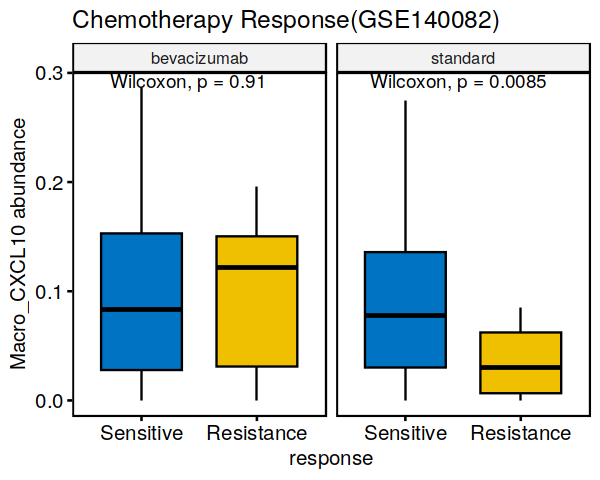

In [40]:
library(ggpubr)
metaData <- GSE140082_metaData
geneExp <- GSE140082_exp
metaData$geneExp<-GSE140082_CIBERSORTx[,'Macro_CXCL10']
compare_means(geneExp ~ response, data = metaData)
p4 <- ggboxplot(data = metaData,x = 'response',y = 'geneExp',ylab = "Macro_CXCL10 abundance",facet.by = "treatment",show.legend = TRUE ,title = 'Chemotherapy Response(GSE140082)',fill = 'response',palette = "jco")+
stat_compare_means()+theme(legend.position="none")
options(repr.plot.height = 4, repr.plot.width = 5)
p4

In [41]:
pdf(file = './output/bulk/section_3/1.cibersort_CXCL10TAM_GSE140082_platinum_response.pdf',width = 5,height =4)
print(p4)
dev.off()

png 
  2

In [44]:
metaData <- GSE140082_metaData
metaData$Macro_CXCL10 <- GSE140082_CIBERSORTx[,'Macro_CXCL10']
metaData$CD8.Te <- GSE140082_CIBERSORTx[,'CD8.Te']
metaData$CD8.Tex <- GSE140082_CIBERSORTx[,'CD8.Tex']
metaData$Plasma.cell <- GSE140082_CIBERSORTx[,'Plasma.cell']
#metaData <- subset(metaData,Treatment=='Pre')
res.cut <- surv_cutpoint(metaData, time = "final_ostm", event = "final_osid",
   variables = c('Macro_CXCL10','CD8.Te','CD8.Tex','Plasma.cell'))
metaData$Macro_CXCL10class <- ifelse(metaData$Macro_CXCL10>summary(res.cut)['Macro_CXCL10','cutpoint'],'High','Low')
metaData$CD8.Teclass <- ifelse(metaData$CD8.Te>summary(res.cut)['CD8.Te','cutpoint'],'High','Low')
metaData$CD8.Texclass <- ifelse(metaData$CD8.Tex>summary(res.cut)['CD8.Tex','cutpoint'],'High','Low')
metaData$Plasma.cellclass <- ifelse(metaData$Plasma.cell>summary(res.cut)['Plasma.cell','cutpoint'],'High','Low')
fit <- survfit(Surv(final_ostm, final_osid) ~ Macro_CXCL10class, data = metaData)
labs <- c(paste0('High(n=',table(metaData$Macro_CXCL10class)['High'],')'),paste0('Low(n=',table(metaData$Macro_CXCL10class)['Low'],')'))
OS_CXCL10 <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='OS rate',
  legend=c(0.3,0.5),
  legend.title='Macro_CXCL10',
  legend.labs = labs
)
fit <- survfit(Surv(final_ostm, final_osid) ~ CD8.Teclass, data = metaData)
labs <- c(paste0('High(n=',table(metaData$CD8.Teclass)['High'],')'),paste0('Low(n=',table(metaData$CD8.Teclass)['Low'],')'))
OS_CD8.Te <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='OS rate',
  legend=c(0.3,0.5),
  legend.title='CD8.Te',
  legend.labs = labs
)
fit <- survfit(Surv(final_ostm, final_osid) ~ CD8.Texclass, data = metaData)
labs <- c(paste0('High(n=',table(metaData$CD8.Texclass)['High'],')'),paste0('Low(n=',table(metaData$CD8.Texclass)['Low'],')'))
OS_CD8.Tex <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='OS rate',
  legend=c(0.3,0.5),
  legend.title='CD8.Tex',
  legend.labs = labs
)
fit <- survfit(Surv(final_ostm, final_osid) ~ Plasma.cellclass, data = metaData)
labs <- c(paste0('High(n=',table(metaData$Plasma.cellclass)['High'],')'),paste0('Low(n=',table(metaData$Plasma.cellclass)['Low'],')'))
OS_Plasma.cell <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='OS rate',
  legend=c(0.3,0.5),
  legend.title='Plasma.cell',
  legend.labs = labs
)


In [45]:
metaData <- GSE140082_metaData
metaData$Macro_CXCL10 <- GSE140082_CIBERSORTx[,'Macro_CXCL10']
metaData$CD8.Te <- GSE140082_CIBERSORTx[,'CD8.Te']
metaData$CD8.Tex <- GSE140082_CIBERSORTx[,'CD8.Tex']
metaData$Plasma.cell <- GSE140082_CIBERSORTx[,'Plasma.cell']
#metaData <- subset(metaData,Treatment=='Pre')
res.cut <- surv_cutpoint(metaData, time = "final_pfstm", event = "final_pfsid",
   variables = c('Macro_CXCL10','CD8.Te','CD8.Tex','Plasma.cell'))
metaData$Macro_CXCL10class <- ifelse(metaData$Macro_CXCL10>summary(res.cut)['Macro_CXCL10','cutpoint'],'High','Low')
metaData$CD8.Teclass <- ifelse(metaData$CD8.Te>summary(res.cut)['CD8.Te','cutpoint'],'High','Low')
metaData$CD8.Texclass <- ifelse(metaData$CD8.Tex>summary(res.cut)['CD8.Tex','cutpoint'],'High','Low')
metaData$Plasma.cellclass <- ifelse(metaData$Plasma.cell>summary(res.cut)['Plasma.cell','cutpoint'],'High','Low')
fit <- survfit(Surv(final_pfstm, final_pfsid) ~ Macro_CXCL10class, data = metaData)
labs <- c(paste0('High(n=',table(metaData$Macro_CXCL10class)['High'],')'),paste0('Low(n=',table(metaData$Macro_CXCL10class)['Low'],')'))
PFS_CXCL10 <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='PFS rate',
  legend=c(0.7,0.85),
  legend.title='Macro_CXCL10',
  legend.labs = labs
)
fit <- survfit(Surv(final_pfstm, final_pfsid) ~ CD8.Teclass, data = metaData)
labs <- c(paste0('High(n=',table(metaData$CD8.Teclass)['High'],')'),paste0('Low(n=',table(metaData$CD8.Teclass)['Low'],')'))
PFS_CD8.Te <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='PFS rate',
  legend=c(0.7,0.85),
  legend.title='CD8.Te',
  legend.labs = labs
)
fit <- survfit(Surv(final_pfstm, final_pfsid) ~ CD8.Texclass, data = metaData)
labs <- c(paste0('High(n=',table(metaData$CD8.Texclass)['High'],')'),paste0('Low(n=',table(metaData$CD8.Texclass)['Low'],')'))
PFS_CD8.Tex <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='PFS rate',
  legend=c(0.7,0.85),
  legend.title='CD8.Tex',
  legend.labs = labs
)
fit <- survfit(Surv(final_pfstm, final_pfsid) ~ Plasma.cellclass, data = metaData)
labs <- c(paste0('High(n=',table(metaData$Plasma.cellclass)['High'],')'),paste0('Low(n=',table(metaData$Plasma.cellclass)['Low'],')'))
PFS_Plasma.cell <- ggsurvplot(
  fit, title='',
  data = metaData,
  size = 1,                 # change line size
  conf.int = F,          # Add confidence interval
    pval.method = TRUE,
  pval = TRUE,              # Add p-value
  risk.table = F,        # Add risk table
  palette =  c("red","blue"),
  #risk.table.col = "strata",# Risk table color by groups
  risk.table.height = 0.25,
  xlab ='Days',
    ylab='PFS rate',
  legend=c(0.7,0.85),
  legend.title='Plasma.cell',
  legend.labs = labs
)

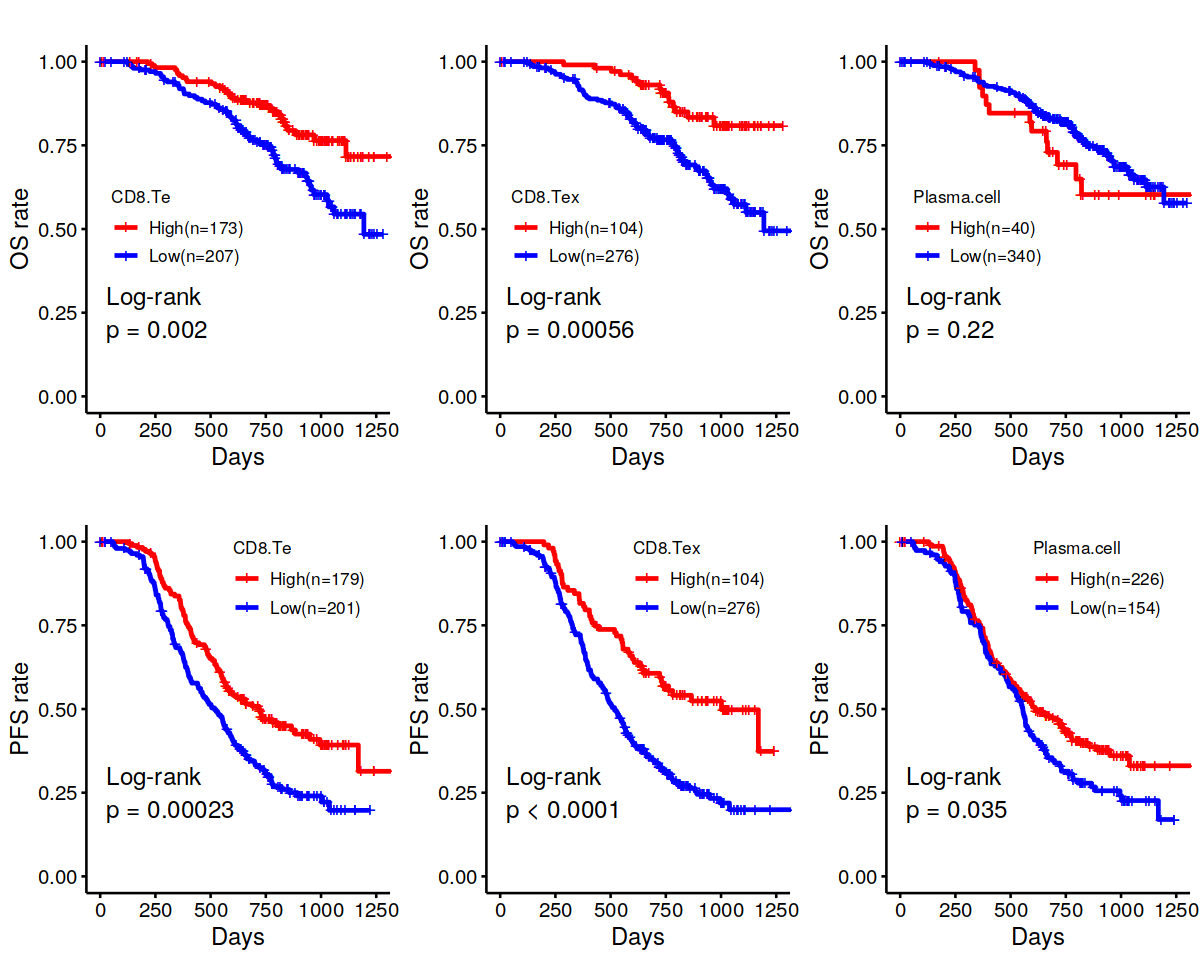

In [46]:
options(repr.plot.height = 8, repr.plot.width = 10)
grid.arrange(OS_CD8.Te$plot,OS_CD8.Tex$plot,OS_Plasma.cell$plot,PFS_CD8.Te$plot,PFS_CD8.Tex$plot,PFS_Plasma.cell$plot,ncol=3)

In [47]:
pdf(file = './output/bulk/section_3/1.cibersort_3CellType_surv_plot_GSE140082.pdf',width = 10,height = 8,pointsize = 6)
grid.arrange(OS_CD8.Te$plot,OS_CD8.Tex$plot,OS_Plasma.cell$plot,PFS_CD8.Te$plot,PFS_CD8.Tex$plot,PFS_Plasma.cell$plot,ncol=3)
dev.off()

png 
  2

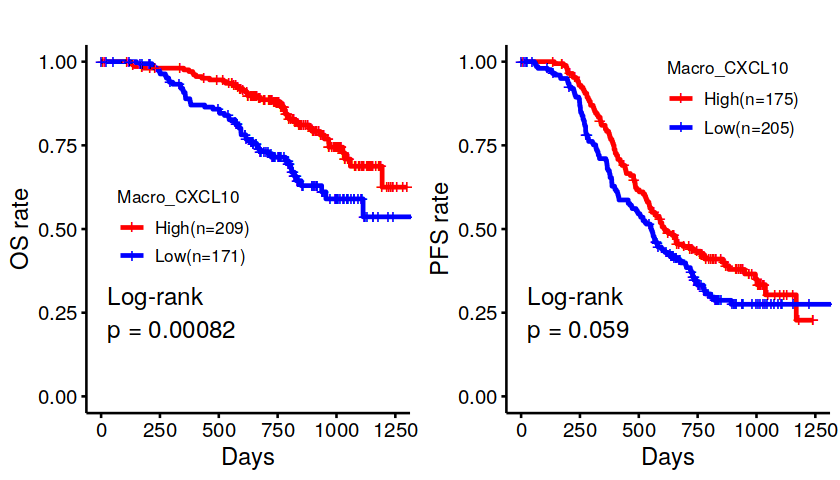

In [49]:
options(repr.plot.height = 4, repr.plot.width = 7)
grid.arrange(OS_CXCL10$plot,PFS_CXCL10$plot,ncol=2)

In [50]:
pdf(file = './output/bulk/section_3/1.cibersort_CXCL10TAM_surv_plot_GSE140082.pdf',width = 4,height = 7)
grid.arrange(OS_CXCL10$plot,PFS_CXCL10$plot,ncol=1)
dev.off()

png 
  2

## 3.3 Prognostic effect of immune cell infiltration(GSE156699)

In [51]:
GSE156699_EXP <- as.matrix(read.table('./data/bulk/GEO/treatment/GSE156699_UI_mRNA.txt.gz',header = T,sep = '\t',row.names = 1))
head(GSE156699_EXP)

Patient1 Patient2 Patient3 Patient4 Patient5 Patient6 Patient7 Patient8
DDX11L1 3.32193  3.32193  3.32193  3.32193  3.32193  3.62929  3.32193  3.32193 
WASH7P  8.59253  8.06855  8.65306  7.04899  8.33499  8.12217  8.67016  8.01244 
FAM138A 3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193 
FAM138C 3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193 
FAM138F 3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193 
OR4F5   3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193  3.32193 
        Patient9 Patient10 ⋯ Patient103 Patient105 Patient106 Patient107
DDX11L1 3.32193  3.32193   ⋯ 3.32193    3.32193    3.32193    3.32193   
WASH7P  8.35093  8.56256   ⋯ 8.56364    8.78107    8.45923    8.18066   
FAM138A 3.32193  3.32193   ⋯ 3.32193    3.32193    3.32193    3.32193   
FAM138C 3.32193  3.32193   ⋯ 3.32193    3.32193    3.32193    3.32193   
FAM138F 3.32193  3.32193   ⋯ 3.32193    3.32193    3.32193    3.32193   
OR4F5   3.32193  3.32193   ⋯ 3.32193    3.32193    3.32193    3.32193   
        Patient109 Patient110 Patient111 Patient113 Patient114 Patient115
DDX11L1 3.32193    3.32193    3.32193    3.32193    3.32193    3.32193   
WASH7P  8.29272    9.32138    8.44576    8.51342    7.47337    7.94128   
FAM138A 3.32193    3.32193    3.32193    3.32193    3.32193    3.32193   
FAM138C 3.32193    3.32193    3.32193    3.32193    3.32193    3.32193   
FAM138F 3.32193    3.32193    3.32193    3.32193    3.32193    3.32193   
OR4F5   3.32193    3.32193    3.32193    3.32193    3.32193    3.32193

In [52]:
GSE156699_metaData <- read.table('./data/bulk/GEO/treatment/GSE156699_MetaData.txt',header = T,sep = '\t')
head(GSE156699_metaData)

SampleID   PID        Stage ChemotherapyResponse
1 GSM4742596 Patient24  3     Non-responders      
2 GSM4742597 Patient37  3     Responders          
3 GSM4742598 Patient113 3     Responders          
4 GSM4742599 Patient92  3     Responders          
5 GSM4742600 Patient94  3     Non-responders      
6 GSM4742601 Patient97  3     Non-responders

In [53]:
GSE156699_CIBERSORTx <- read.table('./data/bulk/GEO/treatment/CIBERSORTx_GSE156699_Results.csv',header = T,sep = ',',row.names = 1)
head(GSE156699_CIBERSORTx)

B.cell     CAF1     CAF2      CAF3 CAF4       CAF5      CD38.NK    
Patient1 0.01469617 0.810639 1.8563839 0    0.88626316 0.2118257 0.294178013
Patient2 0.21742912 6.634139 1.6105083 0    0.15401236 0.0000000 0.003590505
Patient3 0.15703112 3.777949 0.8454972 0    0.21772604 0.0000000 0.369448037
Patient4 0.32185816 7.884216 0.0000000 0    0.09839223 0.0000000 0.033059834
Patient5 0.47071620 0.000000 1.8492268 0    0.91705851 0.1424216 0.060924679
Patient6 0.29190794 3.227733 0.8084627 0    0.08447798 0.0000000 0.000000000
         CD8.Te CD8.Tem    CD8.Tex    ⋯ pDC        Plasma.cell Tfh       
Patient1 0      0.05814578 0.02564540 ⋯ 0.02471827 0.00000000  0.05845541
Patient2 0      0.02979041 0.02877032 ⋯ 0.01505108 0.14014762  0.00000000
Patient3 0      0.02513424 0.00000000 ⋯ 0.10825331 0.00000000  0.07777610
Patient4 0      0.00000000 0.00000000 ⋯ 0.00000000 0.37878844  0.00000000
Patient5 0      0.00000000 0.00000000 ⋯ 0.00000000 0.09302397  0.30122325
Patient6 0      0.00000000 0.00000000 ⋯ 0.10455757 0.00000000  0.09433809
         Th17      Tn        Treg P.value Correlation RMSE     
Patient1 0.0000000 1.1013549 0    0.006   0.1652909   1.0532951
Patient2 0.0000000 0.5008563 0    0.000   0.6723871   0.7754883
Patient3 0.0000000 0.0000000 0    0.000   0.4537461   0.9094519
Patient4 0.2248456 0.0000000 0    0.000   0.7051136   0.7261693
Patient5 0.0000000 0.1249356 0    0.000   0.3930450   0.9272412
Patient6 0.0000000 0.0000000 0    0.000   0.3447991   0.9812015
         Absolute.score..sig.score.
Patient1  8.786229                 
Patient2 12.095732                 
Patient3 11.635209                 
Patient4 13.962311                 
Patient5  9.113080                 
Patient6 10.098907

In [54]:
bothsample <- intersect(GSE156699_metaData$PID,colnames(GSE156699_EXP))
GSE156699_metaData <- GSE156699_metaData[match(GSE156699_metaData$PID,bothsample),]
GSE156699_EXP <- GSE156699_EXP[,bothsample]
GSE156699_CIBERSORTx <- GSE156699_CIBERSORTx[bothsample,]

In [55]:
GSE156699_metaData$response <- ifelse(GSE156699_metaData$ChemotherapyResponse=='Responders','Sensitive','Resistant')
GSE156699_metaData$response <- factor(GSE156699_metaData$response,levels =c('Sensitive','Resistant'),labels = c('Sensitive','Resistant') )
head(GSE156699_metaData)

SampleID   PID        Stage ChemotherapyResponse response 
1 GSM4742596 Patient24  3     Non-responders       Resistant
2 GSM4742597 Patient37  3     Responders           Sensitive
3 GSM4742598 Patient113 3     Responders           Sensitive
4 GSM4742599 Patient92  3     Responders           Sensitive
5 GSM4742600 Patient94  3     Non-responders       Resistant
6 GSM4742601 Patient97  3     Non-responders       Resistant

.y.     group1    group2    p         p.adj p.format p.signif method  
1 geneExp Sensitive Resistant 0.1087685 0.11  0.11     ns       Wilcoxon

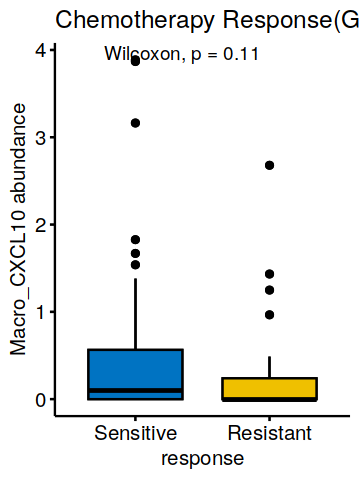

In [57]:
metaData <- GSE156699_metaData
geneExp <- GSE156699_EXP
#metaData$geneExp <- geneExp['CXCL10',]
metaData$geneExp <- GSE156699_CIBERSORTx[,'Macro_CXCL10']
#metaData$geneExp <- moduleScore3['c1_769',]
library(ggpubr)
compare_means(geneExp ~ response, data = metaData)
p2 <- ggboxplot(data = metaData,x = 'response',y = 'geneExp',title = 'Chemotherapy Response(GSE156699)',legend=NULL,fill ='response',ylab='Macro_CXCL10 abundance',add = 'boxplot',palette = "jco")+
stat_compare_means()+theme(legend.position="none")
options(repr.plot.height = 4, repr.plot.width = 3)
p2 


In [58]:
pdf(file = './output/bulk/section_3/1.cibersort_CXCL10TAM_GSE156699_platinum_response.pdf',width = 3,height =4)
print(p2)
dev.off()

png 
  2